**<font color="lime">DATA PREPROCESSING FOR UNSUPERVISED**











**Information about the dataset**


---


> This dataset provides a road accident data from around the world, containing 1,32,000 rows and 30 diverse features. It captures various factors such as accident severity, weather conditions, vehicle involvement, driver characteristics, and geographic regions.

---



> **What was the problem with this dataset and what we did?**

This dataset was a mixture of categorical and numerical value. Firstly we tried to null values but there were none. Then we used label encoding to covert catagorical data into numerical data. After that we used IQR, Z-score to look for outliers but there were none. Apart from that we used exploratory data analysis to find patterns and visualize the data.








In [32]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [33]:
# Google Sheet URL
sheet_url = "https://docs.google.com/spreadsheets/d/1PkVTq-1VWvd5kIIHQfylITDSCYMs3hF1On0cfsZ-zN8/edit?gid=1593523052"

# Convert Google Sheet URL to CSV export URL
csv_url = sheet_url.replace("/edit?gid=", "/gviz/tq?tqx=out:csv&gid=")

# Read the Google Sheet into a DataFrame
df = pd.read_csv(csv_url)
original_data = df.copy()


In [34]:
df.head()

Country  Year     Month Day of Week Time of Day Urban/Rural  Road Type  \
0     USA  2002   October     Tuesday     Evening       Rural     Street   
1      UK  2014  December    Saturday     Evening       Urban     Street   
2     USA  2012      July      Sunday   Afternoon       Urban    Highway   
3      UK  2017       May    Saturday     Evening       Urban  Main Road   
4  Canada  2002      July     Tuesday   Afternoon       Rural    Highway   

  Weather Conditions  Visibility Level  Number of Vehicles Involved  \
0              Windy        220.414650                            1   
1              Windy        168.311358                            3   
2              Snowy        341.286506                            4   
3              Clear        489.384536                            2   
4              Rainy        348.344850                            1   

   Speed Limit Driver Age Group Driver Gender  Driver Alcohol Level  \
0           37            18-25          Male              0.051921   
1           96            18-25        Female              0.234893   
2           62            41-60          Male              0.142366   
3           78            18-25          Male              0.120815   
4           98            41-60          Male              0.155842   

   Driver Fatigue Vehicle Condition  Pedestrians Involved  Cyclists Involved  \
0               0              Poor                     1                  2   
1               1              Poor                     1                  1   
2               0          Moderate                     0                  0   
3               1              Good                     2                  0   
4               1              Poor                     0                  1   

  Accident Severity  Number of Injuries  Number of Fatalities  \
0          Moderate                   8                     2   
1             Minor                   6                     1   
2          Moderate                  13                     4   
3             Minor                   6                     3   
4          Moderate                  13                     4   

   Emergency Response Time  Traffic Volume Road Condition      Accident Cause  \
0                58.625720     7412.752760            Wet             Weather   
1                58.041380     4458.628820   Snow-covered  Mechanical Failure   
2                42.374452     9856.915064            Wet            Speeding   
3                48.554014     4958.646267            Icy  Distracted Driving   
4                18.318250     3843.191463            Icy  Distracted Driving   

   Insurance Claims  Medical Cost  Economic Loss         Region  \
0                 4  40499.856980   22072.878500         Europe   
1                 3   6486.600073    9534.399441  North America   
2                 4  29164.412980   58009.145120  South America   
3                 3  25797.212570   20907.151300      Australia   
4                 8  15605.293920   13584.060760  South America   

   Population Density  
0         3866.273014  
1         2333.916224  
2         4408.889129  
3         2810.822423  
4         3883.645634

In [35]:
#Displays summary of the whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      132000 non-null  object 
 1   Year                         132000 non-null  int64  
 2   Month                        132000 non-null  object 
 3   Day of Week                  132000 non-null  object 
 4   Time of Day                  132000 non-null  object 
 5   Urban/Rural                  132000 non-null  object 
 6   Road Type                    132000 non-null  object 
 7   Weather Conditions           132000 non-null  object 
 8   Visibility Level             132000 non-null  float64
 9   Number of Vehicles Involved  132000 non-null  int64  
 10  Speed Limit                  132000 non-null  int64  
 11  Driver Age Group             132000 non-null  object 
 12  Driver Gender                132000 non-null  object 
 13 

In [36]:
df.columns #checks column names

Index(['Country', 'Year', 'Month', 'Day of Week', 'Time of Day', 'Urban/Rural',
       'Road Type', 'Weather Conditions', 'Visibility Level',
       'Number of Vehicles Involved', 'Speed Limit', 'Driver Age Group',
       'Driver Gender', 'Driver Alcohol Level', 'Driver Fatigue',
       'Vehicle Condition', 'Pedestrians Involved', 'Cyclists Involved',
       'Accident Severity', 'Number of Injuries', 'Number of Fatalities',
       'Emergency Response Time', 'Traffic Volume', 'Road Condition',
       'Accident Cause', 'Insurance Claims', 'Medical Cost', 'Economic Loss',
       'Region', 'Population Density'],
      dtype='object')

In [37]:
df.shape

(132000, 30)

In [38]:
df.describe()

Year  Visibility Level  Number of Vehicles Involved  \
count  132000.000000     132000.000000                132000.000000   
mean     2011.973348        275.038776                     2.501227   
std         7.198624        129.923625                     1.117272   
min      2000.000000         50.001928                     1.000000   
25%      2006.000000        162.338860                     2.000000   
50%      2012.000000        274.672990                     3.000000   
75%      2018.000000        388.014111                     3.000000   
max      2024.000000        499.999646                     4.000000   

         Speed Limit  Driver Alcohol Level  Driver Fatigue  \
count  132000.000000         132000.000000   132000.000000   
mean       74.544068              0.125232        0.500576   
std        26.001448              0.072225        0.500002   
min        30.000000              0.000002        0.000000   
25%        52.000000              0.062630        0.000000   
50%        74.000000              0.125468        1.000000   
75%        97.000000              0.187876        1.000000   
max       119.000000              0.249999        1.000000   

       Pedestrians Involved  Cyclists Involved  Number of Injuries  \
count         132000.000000      132000.000000       132000.000000   
mean               1.000773           0.998356            9.508205   
std                0.816304           0.817764            5.774366   
min                0.000000           0.000000            0.000000   
25%                0.000000           0.000000            5.000000   
50%                1.000000           1.000000            9.000000   
75%                2.000000           2.000000           15.000000   
max                2.000000           2.000000           19.000000   

       Number of Fatalities  Emergency Response Time  Traffic Volume  \
count         132000.000000            132000.000000   132000.000000   
mean               1.995439                32.491746     5041.929098   
std                1.412974                15.889537     2860.671611   
min                0.000000                 5.000177      100.062626   
25%                1.000000                18.732879     2560.601300   
50%                2.000000                32.534944     5037.909855   
75%                3.000000                46.289527     7524.638162   
max                4.000000                59.999588     9999.997468   

       Insurance Claims   Medical Cost  Economic Loss  Population Density  
count     132000.000000  132000.000000  132000.000000       132000.000000  
mean           4.495621   25198.454901   50437.505615         2506.476223  
std            2.867347   14274.771691   28584.290822         1440.646352  
min            0.000000     500.110091    1000.335085           10.002669  
25%            2.000000   12836.933595   25692.817342         1258.158299  
50%            4.000000   25188.202670   50395.499875         2506.203333  
75%            7.000000   37529.024900   75186.626095         3756.652950  
max            9.000000   49999.930130   99999.622970         4999.991745

In [39]:
duplicates = df[df.duplicated(keep='first')] #find the duplicate values
duplicates

Empty DataFrame
Columns: [Country, Year, Month, Day of Week, Time of Day, Urban/Rural, Road Type, Weather Conditions, Visibility Level, Number of Vehicles Involved, Speed Limit, Driver Age Group, Driver Gender, Driver Alcohol Level, Driver Fatigue, Vehicle Condition, Pedestrians Involved, Cyclists Involved, Accident Severity, Number of Injuries, Number of Fatalities, Emergency Response Time, Traffic Volume, Road Condition, Accident Cause, Insurance Claims, Medical Cost, Economic Loss, Region, Population Density]
Index: []

In [40]:
df.isnull().sum() # check for null values in the dataset

Country                        0
Year                           0
Month                          0
Day of Week                    0
Time of Day                    0
Urban/Rural                    0
Road Type                      0
Weather Conditions             0
Visibility Level               0
Number of Vehicles Involved    0
Speed Limit                    0
Driver Age Group               0
Driver Gender                  0
Driver Alcohol Level           0
Driver Fatigue                 0
Vehicle Condition              0
Pedestrians Involved           0
Cyclists Involved              0
Accident Severity              0
Number of Injuries             0
Number of Fatalities           0
Emergency Response Time        0
Traffic Volume                 0
Road Condition                 0
Accident Cause                 0
Insurance Claims               0
Medical Cost                   0
Economic Loss                  0
Region                         0
Population Density             0
dtype: int64

In [41]:
#We can only see the first few and last few rows as CSV but to preprocess properly, we have to make sure all the features are visible for preprocessing
pd.set_option("display.max_columns", None)  # Show all columns
print(df.head())  # Display the full dataset with all columns

  Country  Year     Month Day of Week Time of Day Urban/Rural  Road Type  \
0     USA  2002   October     Tuesday     Evening       Rural     Street   
1      UK  2014  December    Saturday     Evening       Urban     Street   
2     USA  2012      July      Sunday   Afternoon       Urban    Highway   
3      UK  2017       May    Saturday     Evening       Urban  Main Road   
4  Canada  2002      July     Tuesday   Afternoon       Rural    Highway   

  Weather Conditions  Visibility Level  Number of Vehicles Involved  \
0              Windy        220.414650                            1   
1              Windy        168.311358                            3   
2              Snowy        341.286506                            4   
3              Clear        489.384536                            2   
4              Rainy        348.344850                            1   

   Speed Limit Driver Age Group Driver Gender  Driver Alcohol Level  \
0           37            18-25          Male

In [42]:
pd.set_option("display.max_rows", None)  # Show all rows (i.e., all columns in `.sum()`)
print(df.isnull().sum())


Country                        0
Year                           0
Month                          0
Day of Week                    0
Time of Day                    0
Urban/Rural                    0
Road Type                      0
Weather Conditions             0
Visibility Level               0
Number of Vehicles Involved    0
Speed Limit                    0
Driver Age Group               0
Driver Gender                  0
Driver Alcohol Level           0
Driver Fatigue                 0
Vehicle Condition              0
Pedestrians Involved           0
Cyclists Involved              0
Accident Severity              0
Number of Injuries             0
Number of Fatalities           0
Emergency Response Time        0
Traffic Volume                 0
Road Condition                 0
Accident Cause                 0
Insurance Claims               0
Medical Cost                   0
Economic Loss                  0
Region                         0
Population Density             0
dtype: int

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Initialize Label Encoder
label_encoders = {}

# Apply Label Encoding to all columns
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le  # Store encoder for later inverse transformation if needed

# Display transformed data
df.head()

Country  Year  Month  Day of Week  Time of Day  Urban/Rural  Road Type  \
0        9     2     10            5            1            0          2   
1        8    14      2            2            1            1          2   
2        9    12      5            3            0            1          0   
3        8    17      8            2            1            1          1   
4        2     2      5            5            0            0          0   

   Weather Conditions  Visibility Level  Number of Vehicles Involved  \
0                   4             35496                            0   
1                   4             20145                            2   
2                   3             70839                            3   
3                   0            114326                            1   
4                   2             72968                            0   

   Speed Limit  Driver Age Group  Driver Gender  Driver Alcohol Level  \
0           27                 0              1                 27295   
1           86                 0              0                123832   
2           52                 2              1                 74945   
3           68                 0              1                 63593   
4           88                 2              1                 82022   

   Driver Fatigue  Vehicle Condition  Pedestrians Involved  Cyclists Involved  \
0               0                  2                     1                  2   
1               1                  2                     1                  1   
2               0                  1                     0                  0   
3               1                  0                     2                  0   
4               1                  2                     0                  1   

   Accident Severity  Number of Injuries  Number of Fatalities  \
0                  1                  18                     2   
1                  0                  16                     1   
2                  1                   5                     4   
3                  0                  16                     3   
4                  1                   5                     4   

   Emergency Response Time  Traffic Volume  Road Condition  Accident Cause  \
0                   119152           94008               3               4   
1                   117779           50788               2               2   
2                    77608          129954               3               3   
3                    92382           58056               1               0   
4                    19959           41903               1               0   

   Insurance Claims  Medical Cost  Economic Loss  Region  Population Density  
0                 4         89570          17687       2               84105  
1                 3        121665         125137       3               39253  
2                 4         56388          70637       4              100238  
3                 3         46509          16011       1               53200  
4                 8         16461           5221       4               84651

In [44]:
#Explatory data analysiss
#descriptive analysis
df.describe().T

count          mean           std  min  \
Country                      132000.0      4.480909      2.874520  0.0   
Year                         132000.0     11.973348      7.198624  0.0   
Month                        132000.0      5.507652      3.448939  0.0   
Day of Week                  132000.0      3.007182      2.002281  0.0   
Time of Day                  132000.0      1.502197      1.119330  0.0   
Urban/Rural                  132000.0      0.496197      0.499987  0.0   
Road Type                    132000.0      0.999720      0.815585  0.0   
Weather Conditions           132000.0      2.003879      1.415804  0.0   
Visibility Level             132000.0  65999.001030  38104.829092  0.0   
Number of Vehicles Involved  132000.0      1.501227      1.117272  0.0   
Speed Limit                  132000.0     44.436568     25.983820  0.0   
Driver Age Group             132000.0      1.998977      1.416619  0.0   
Driver Gender                132000.0      0.500742      0.500001  0.0   
Driver Alcohol Level         132000.0  65998.087992  38103.992316  0.0   
Driver Fatigue               132000.0      0.500576      0.500002  0.0   
Vehicle Condition            132000.0      0.999235      0.816903  0.0   
Pedestrians Involved         132000.0      1.000773      0.816304  0.0   
Cyclists Involved            132000.0      0.998356      0.817764  0.0   
Accident Severity            132000.0      0.999030      0.816490  0.0   
Number of Injuries           132000.0      9.522402      5.759788  0.0   
Number of Fatalities         132000.0      1.995439      1.412974  0.0   
Emergency Response Time      132000.0  65999.500000  38105.262104  0.0   
Traffic Volume               132000.0  65999.500000  38105.262104  0.0   
Road Condition               132000.0      1.506568      1.119448  0.0   
Accident Cause               132000.0      1.996288      1.413603  0.0   
Insurance Claims             132000.0      4.495621      2.867347  0.0   
Medical Cost                 132000.0  65998.819167  38104.885730  0.0   
Economic Loss                132000.0  65999.500000  38105.262104  0.0   
Region                       132000.0      1.997091      1.412876  0.0   
Population Density           132000.0  65998.874500  38104.856371  0.0   

                                  25%      50%       75%       max  
Country                          2.00      4.0      7.00       9.0  
Year                             6.00     12.0     18.00      24.0  
Month                            3.00      6.0      8.00      11.0  
Day of Week                      1.00      3.0      5.00       6.0  
Time of Day                      1.00      2.0      3.00       3.0  
Urban/Rural                      0.00      0.0      1.00       1.0  
Road Type                        0.00      1.0      2.00       2.0  
Weather Conditions               1.00      2.0      3.00       4.0  
Visibility Level             32999.75  65999.5  98998.25  131998.0  
Number of Vehicles Involved      1.00      2.0      2.00       3.0  
Speed Limit                     22.00     44.0     67.00      89.0  
Driver Age Group                 1.00      2.0      3.00       4.0  
Driver Gender                    0.00      1.0      1.00       1.0  
Driver Alcohol Level         32999.75  65998.5  98996.25  131996.0  
Driver Fatigue                   0.00      1.0      1.00       1.0  
Vehicle Condition                0.00      1.0      2.00       2.0  
Pedestrians Involved             0.00      1.0      2.00       2.0  
Cyclists Involved                0.00      1.0      2.00       2.0  
Accident Severity                0.00      1.0      2.00       2.0  
Number of Injuries               5.00     10.0     15.00      19.0  
Number of Fatalities             1.00      2.0      3.00       4.0  
Emergency Response Time      32999.75  65999.5  98999.25  131999.0  
Traffic Volume               32999.75  65999.5  98999.25  131999.0  
Road Condition                   1.00      2.0      3.00       3.0  
Accident Cau

In [45]:
import numpy as np

def find_outliers_iqr(df):
    outlier_dict = {}  # Dictionary to store outlier counts per column

    for column in df.select_dtypes(include=np.number).columns:  # Select only numeric columns
        Q1 = df[column].quantile(0.25)  # 25th percentile
        Q3 = df[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers (including all values)
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]

        # Store in dictionary
        outlier_dict[column] = outlier_count

    return outlier_dict

# Detect outliers in all numeric columns
outliers = find_outliers_iqr(df)

# Print outlier count per column
print("Outlier Counts per Column:")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")


Outlier Counts per Column:
Country: 0 outliers
Year: 0 outliers
Month: 0 outliers
Day of Week: 0 outliers
Time of Day: 0 outliers
Urban/Rural: 0 outliers
Road Type: 0 outliers
Weather Conditions: 0 outliers
Visibility Level: 0 outliers
Number of Vehicles Involved: 0 outliers
Speed Limit: 0 outliers
Driver Age Group: 0 outliers
Driver Gender: 0 outliers
Driver Alcohol Level: 0 outliers
Driver Fatigue: 0 outliers
Vehicle Condition: 0 outliers
Pedestrians Involved: 0 outliers
Cyclists Involved: 0 outliers
Accident Severity: 0 outliers
Number of Injuries: 0 outliers
Number of Fatalities: 0 outliers
Emergency Response Time: 0 outliers
Traffic Volume: 0 outliers
Road Condition: 0 outliers
Accident Cause: 0 outliers
Insurance Claims: 0 outliers
Medical Cost: 0 outliers
Economic Loss: 0 outliers
Region: 0 outliers
Population Density: 0 outliers


In [46]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

#As there are too many outliers using IQR, we have decided to take an alternative approach of finding outlier with z-score
def find_outliers_zscore(df, threshold=3):
    outlier_dict = {}  # Dictionary to store outlier counts per column

    for column in df.select_dtypes(include=np.number).columns:  # Select only numeric columns
        z_scores = np.abs(zscore(df[column]))  # Compute absolute Z-scores
        outliers = df[z_scores > threshold]  # Find outliers with Z-score > threshold
        outlier_count = outliers.shape[0]  # Count outliers

        outlier_dict[column] = outlier_count  # Store result

    return outlier_dict

# Detect outliers in all numeric columns using Z-score
outliers = find_outliers_zscore(df)

# Print outlier count per column
print("Outlier Counts per Column (Z-score method):")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")

Outlier Counts per Column (Z-score method):
Country: 0 outliers
Year: 0 outliers
Month: 0 outliers
Day of Week: 0 outliers
Time of Day: 0 outliers
Urban/Rural: 0 outliers
Road Type: 0 outliers
Weather Conditions: 0 outliers
Visibility Level: 0 outliers
Number of Vehicles Involved: 0 outliers
Speed Limit: 0 outliers
Driver Age Group: 0 outliers
Driver Gender: 0 outliers
Driver Alcohol Level: 0 outliers
Driver Fatigue: 0 outliers
Vehicle Condition: 0 outliers
Pedestrians Involved: 0 outliers
Cyclists Involved: 0 outliers
Accident Severity: 0 outliers
Number of Injuries: 0 outliers
Number of Fatalities: 0 outliers
Emergency Response Time: 0 outliers
Traffic Volume: 0 outliers
Road Condition: 0 outliers
Accident Cause: 0 outliers
Insurance Claims: 0 outliers
Medical Cost: 0 outliers
Economic Loss: 0 outliers
Region: 0 outliers
Population Density: 0 outliers


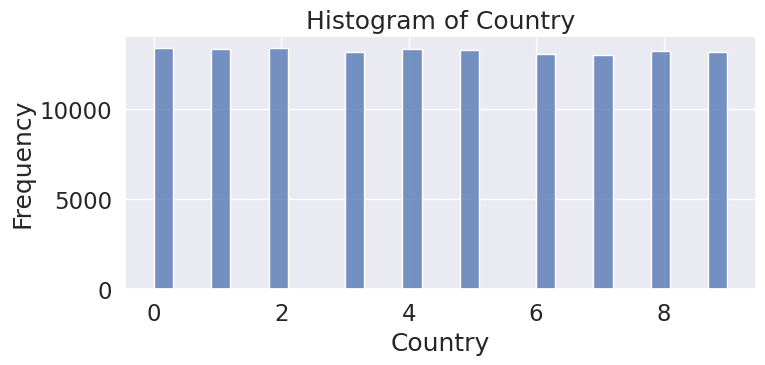

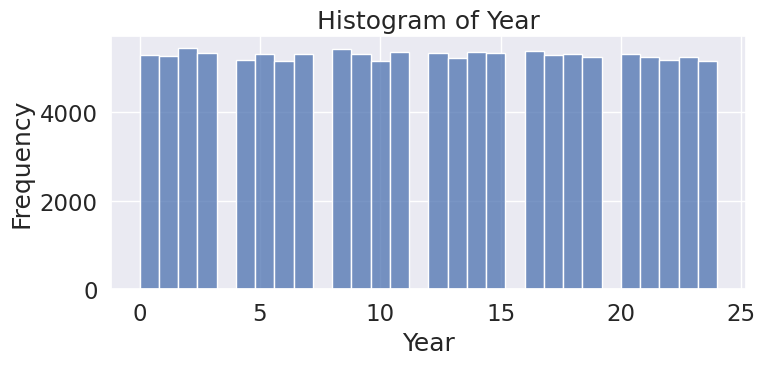

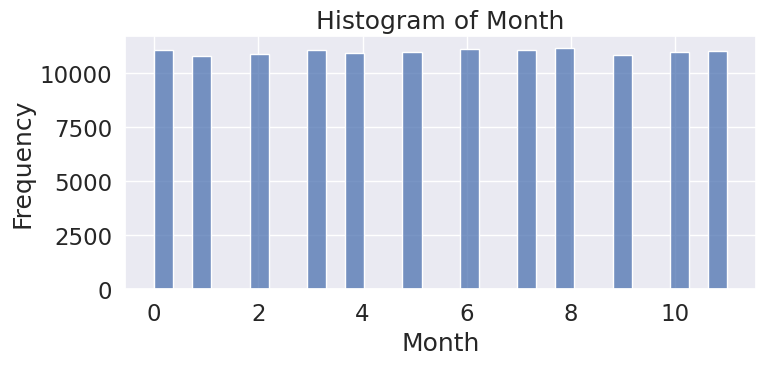

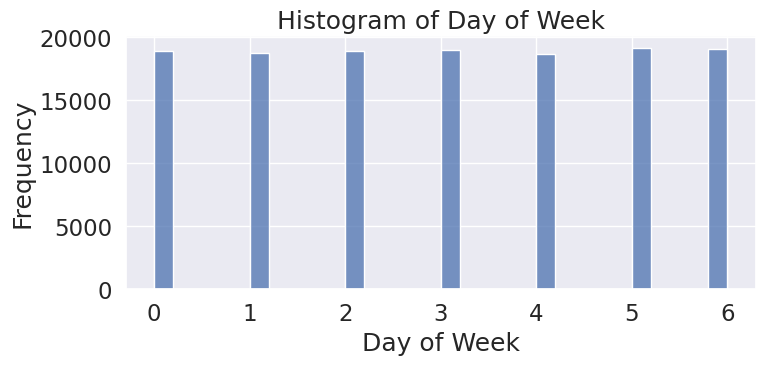

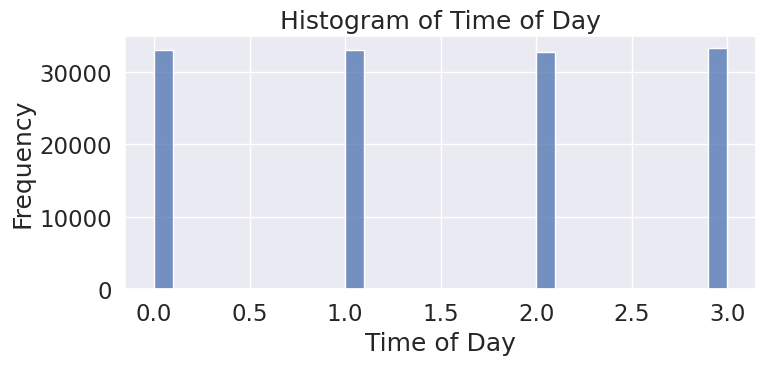

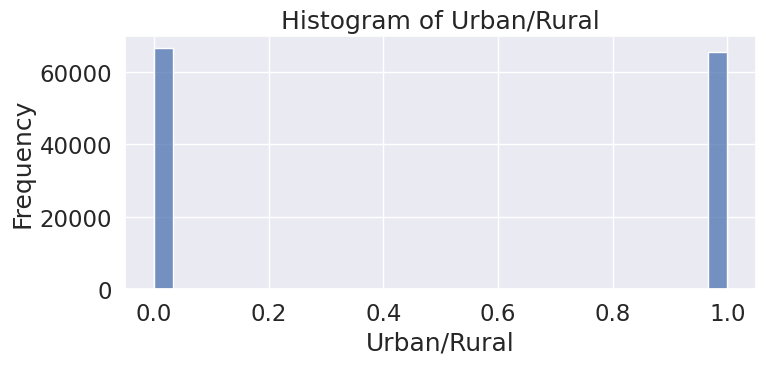

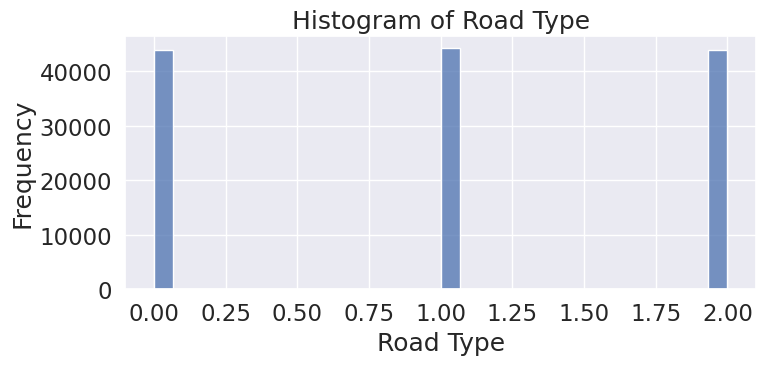

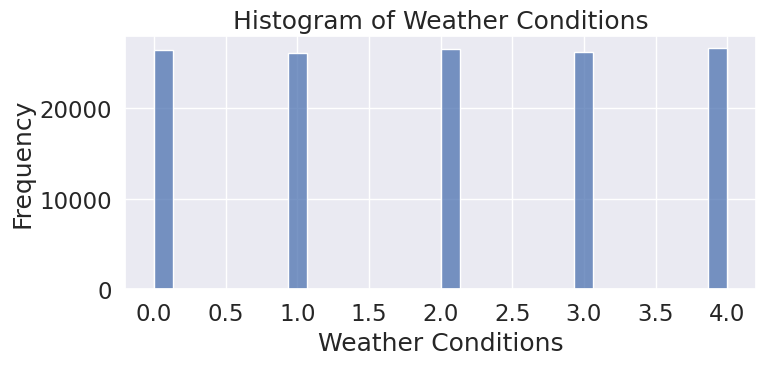

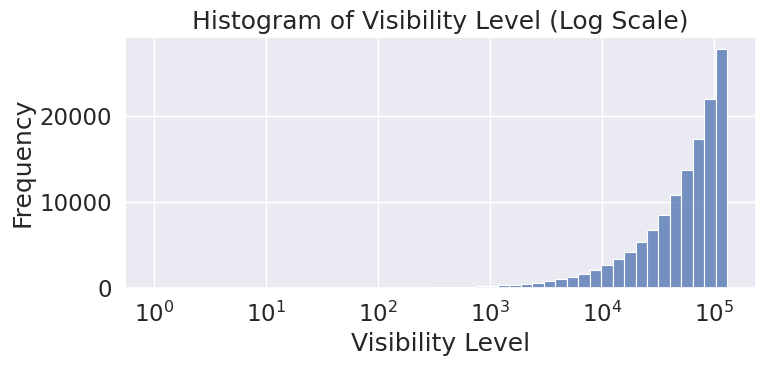

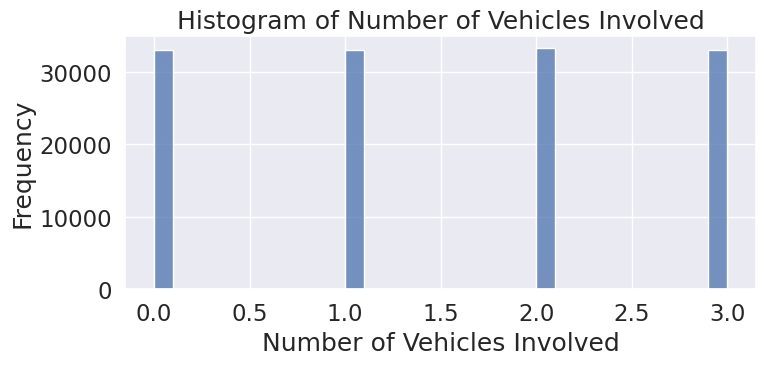

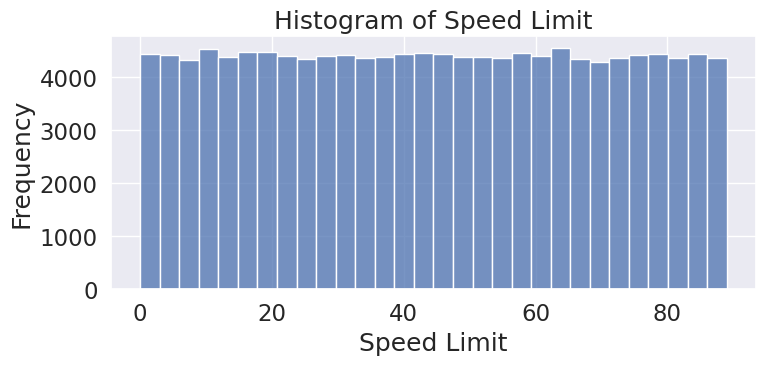

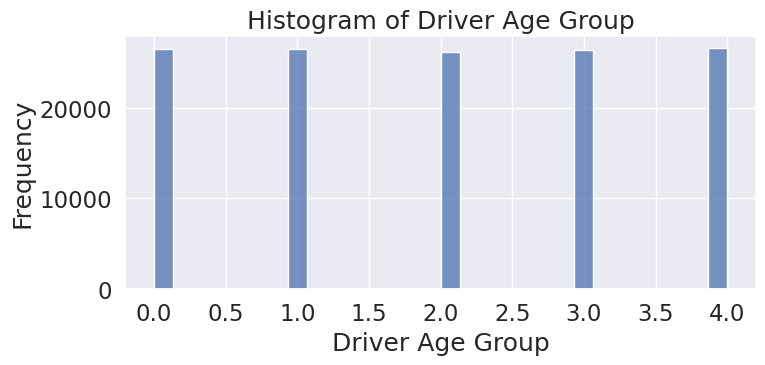

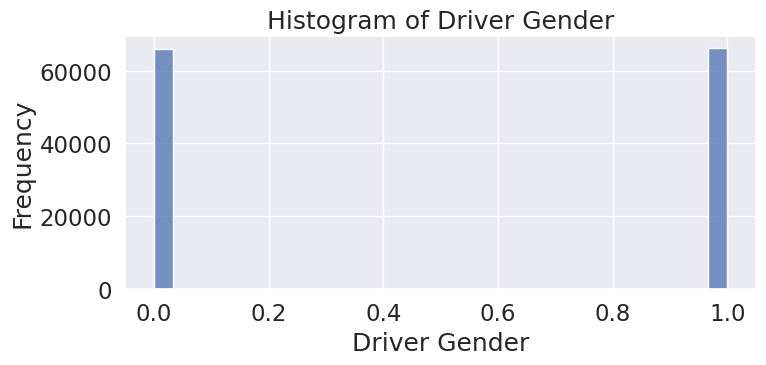

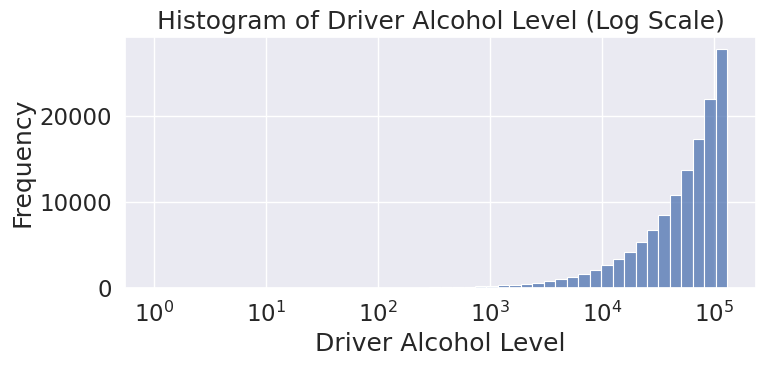

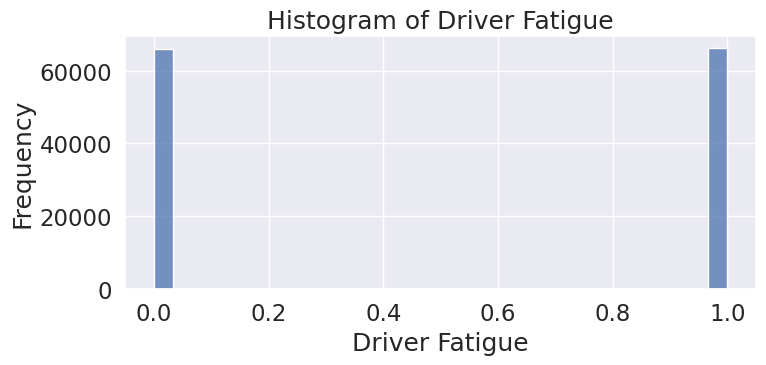

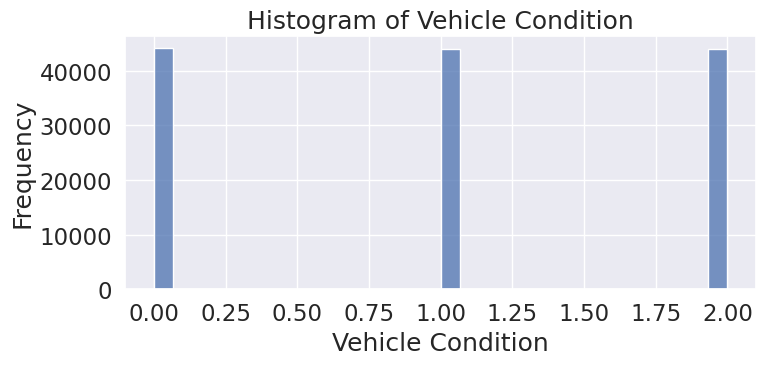

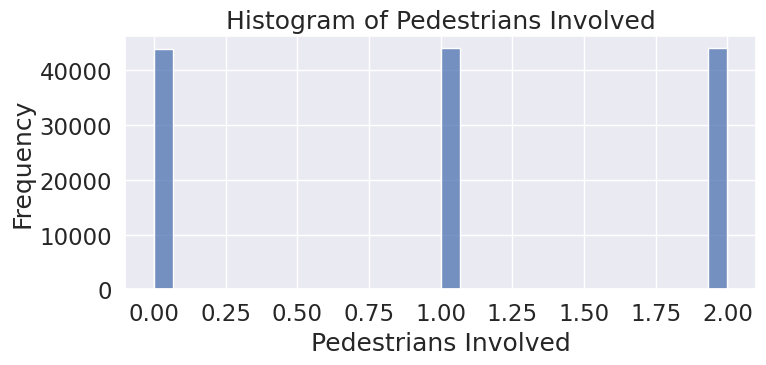

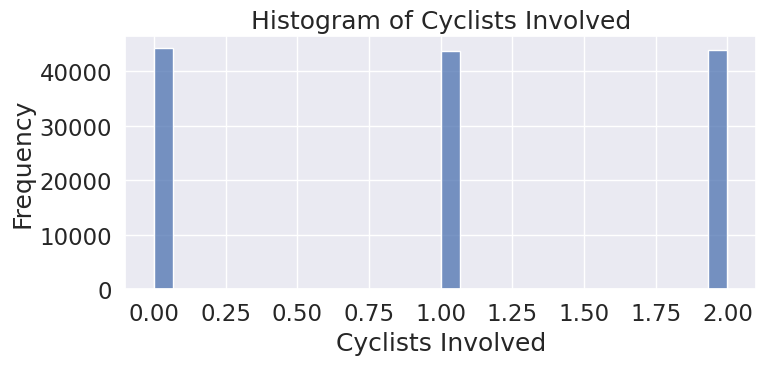

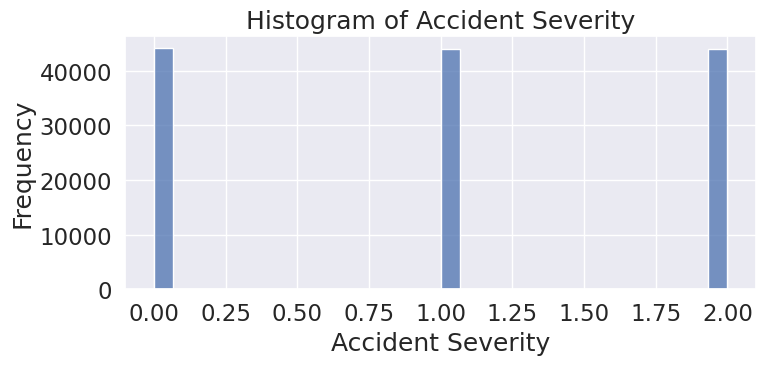

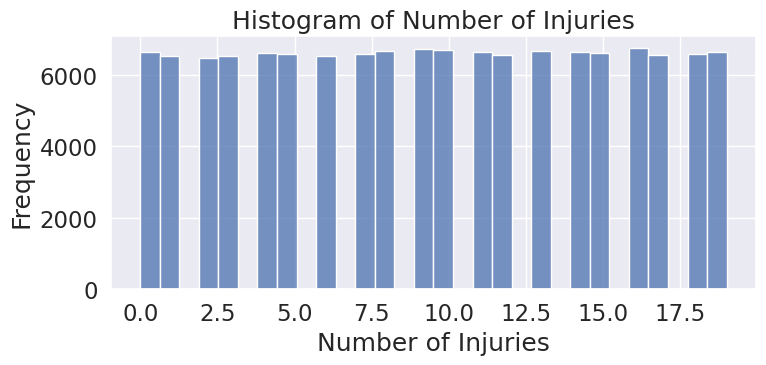

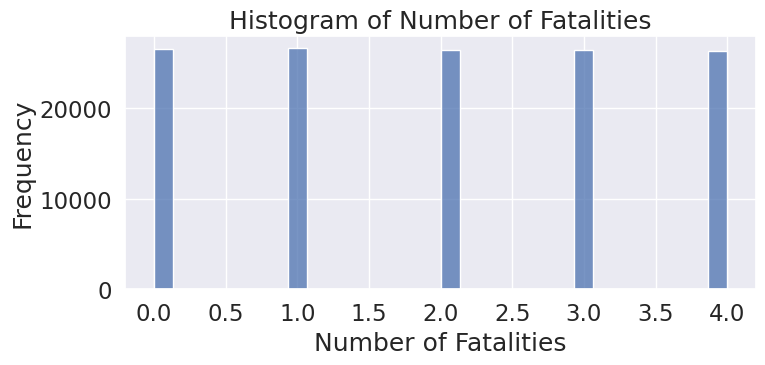

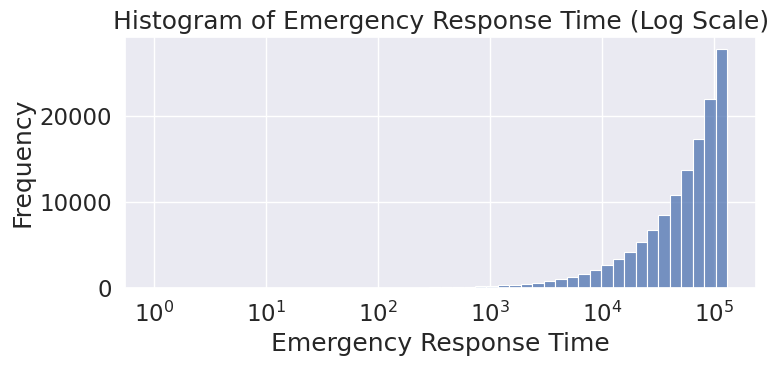

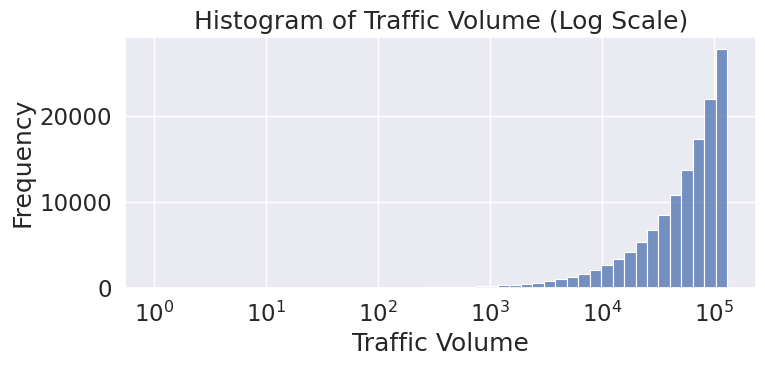

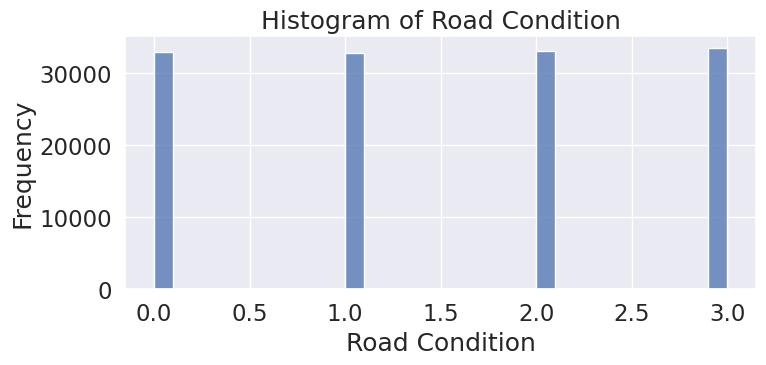

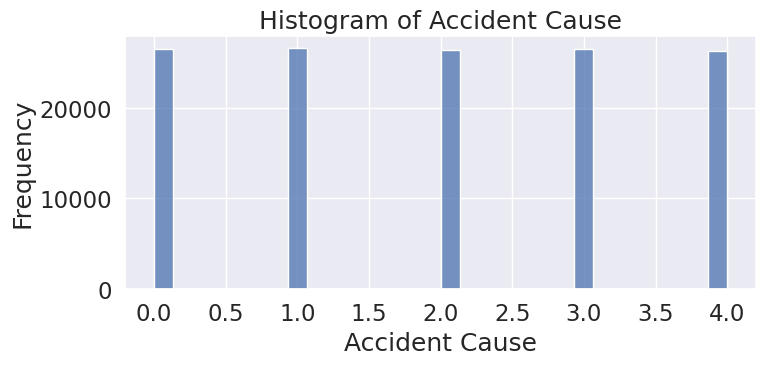

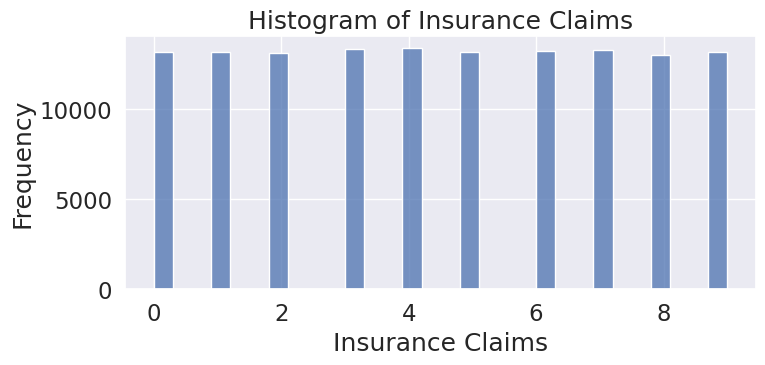

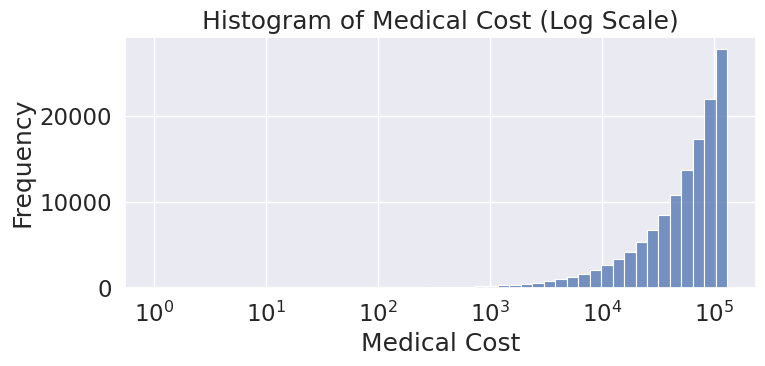

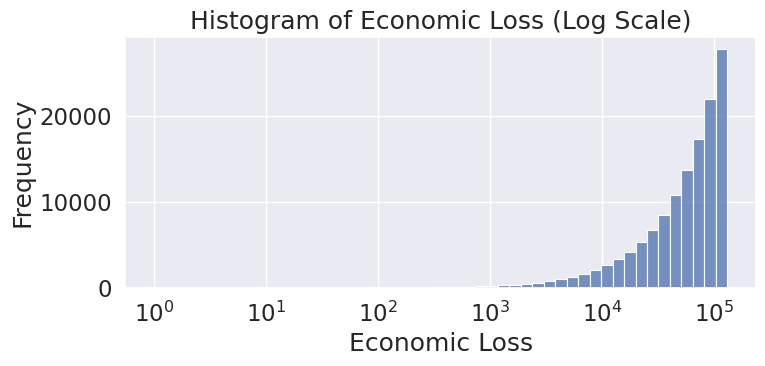

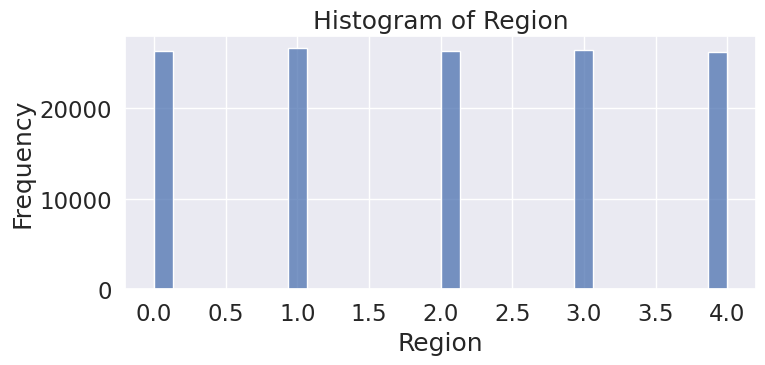

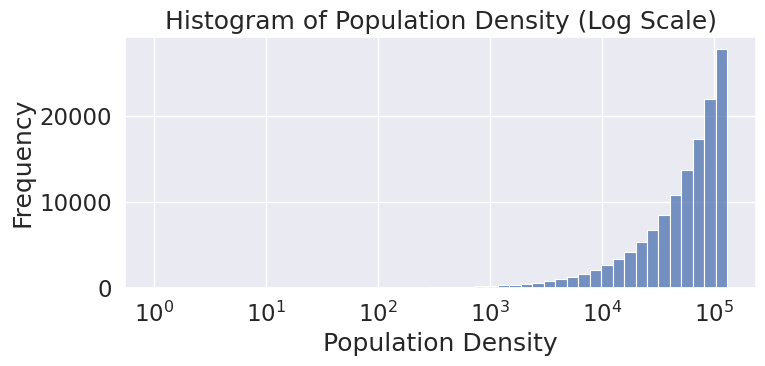

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through numeric columns
for i, column in enumerate(df.select_dtypes(include="number").columns):
    plt.figure(figsize=(8, 4))  # Set figure size for each histogram


    if df[column].min() == 0:

        temp_column = df[column] + 1
    else:
        temp_column = df[column]


    if temp_column.max() / temp_column.min() > 100:  # Use log scale for highly skewed data
        sns.histplot(data=df, x=column, bins=50, log_scale=True)  # Use log scale and more bins
        plt.title(f"Histogram of {column} (Log Scale)")
    else:
        sns.histplot(data=df, x=column, bins=30)  # Use default scale and fewer bins
        plt.title(f"Histogram of {column}")

    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()  # Ensure proper spacing
    plt.show()

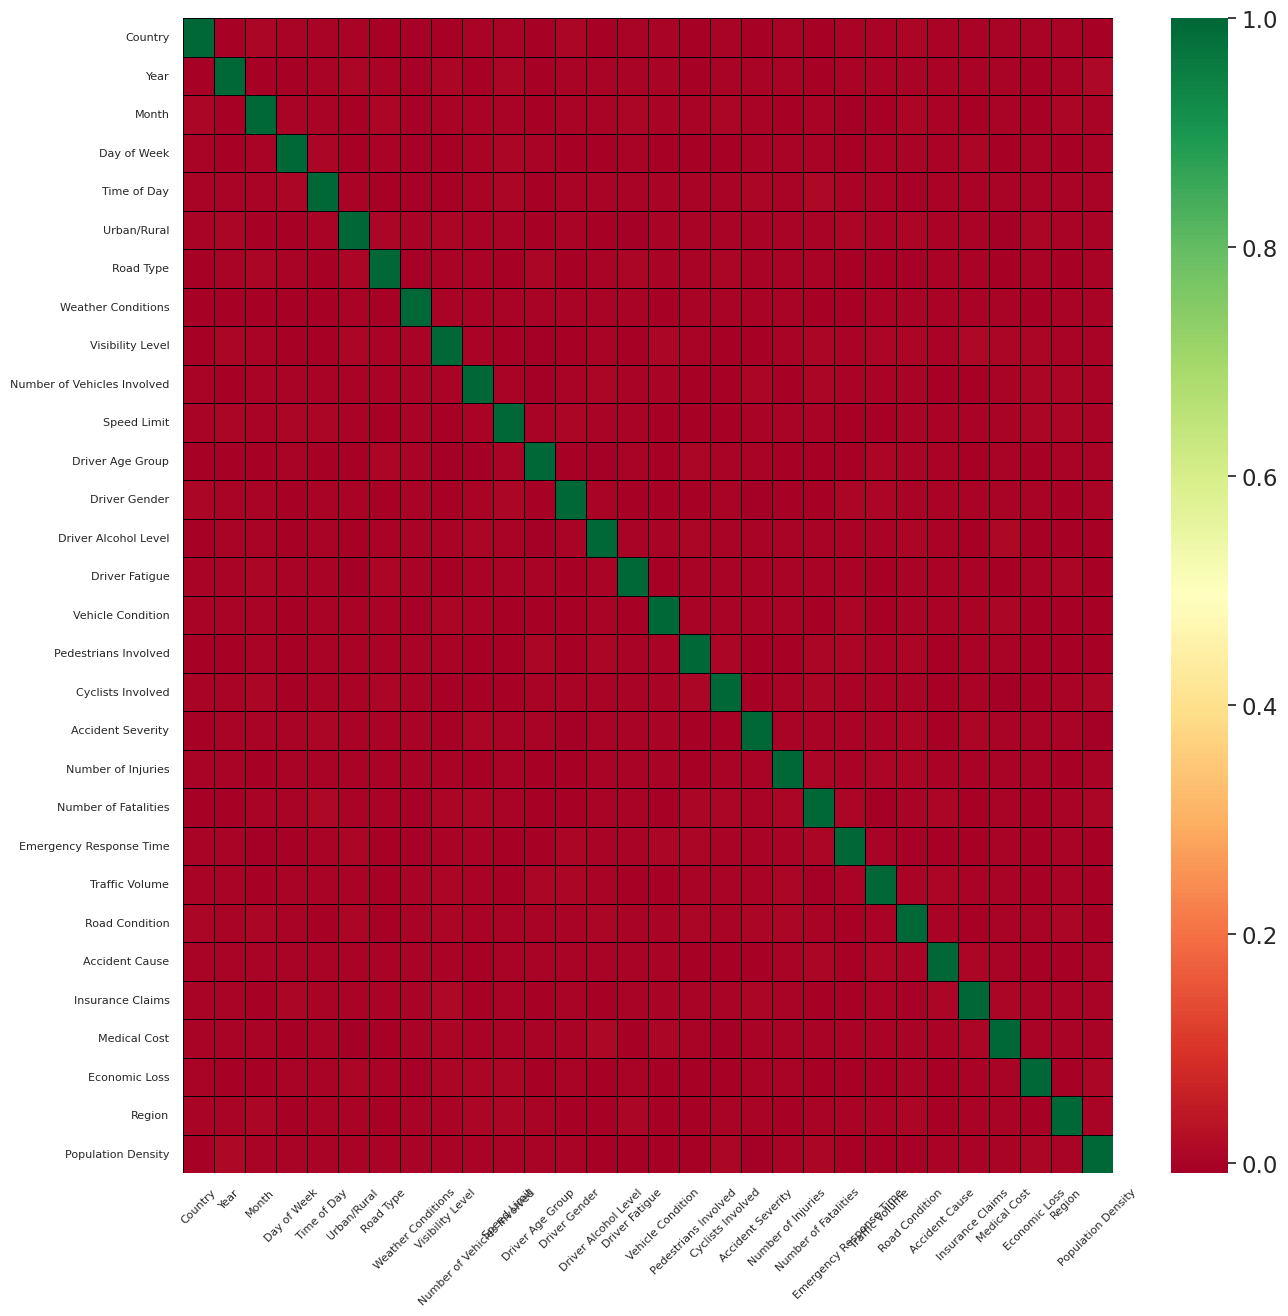

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set dynamic figure size based on the number of columns
num_cols = len(df.columns)
fig_width = min(20, num_cols * 0.5)  # Scale width but limit max size
fig_height = min(20, num_cols * 0.5)  # Scale height but limit max size

plt.figure(figsize=(fig_width, fig_height))  # Adjust figure size
sns.set(font_scale=min(1.5, 200/num_cols))  # Adjust font size dynamically

# Create heatmap with improved visibility
heat_plot = sns.heatmap(
    df.corr(method='pearson'),
    annot=False,  # Keep annotations off for readability
    cmap='RdYlGn',
    linewidths=0.5,  # Add small gaps for clarity
    linecolor='black'
)

# Rotate labels dynamically based on number of columns
plt.xticks(fontsize=max(8, 200/num_cols), rotation=45 if num_cols > 20 else 0)
plt.yticks(fontsize=max(8, 200/num_cols))

plt.show()

<Figure size 1500x1000 with 0 Axes>

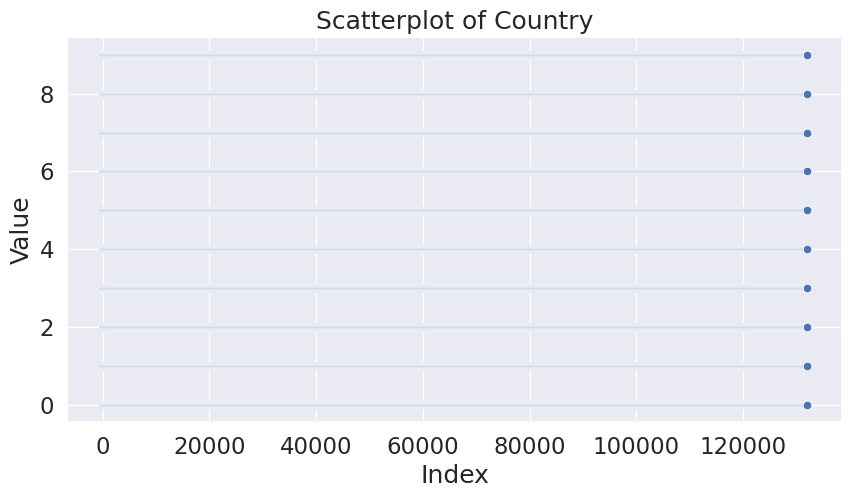

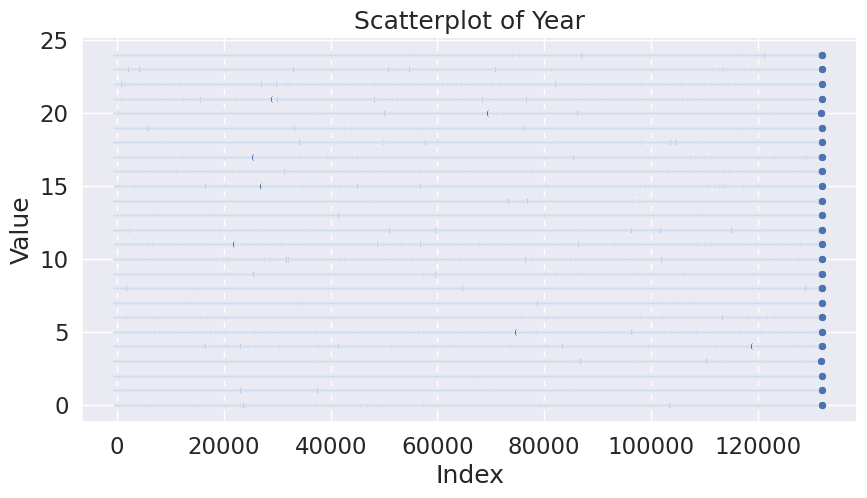

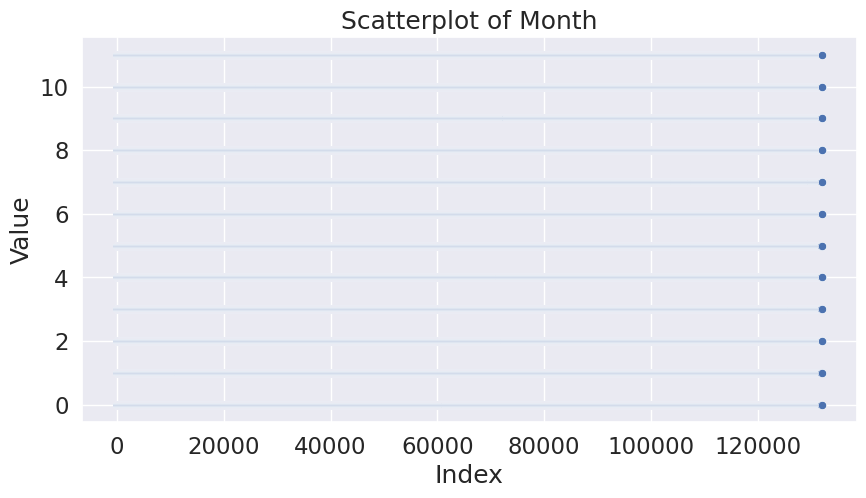

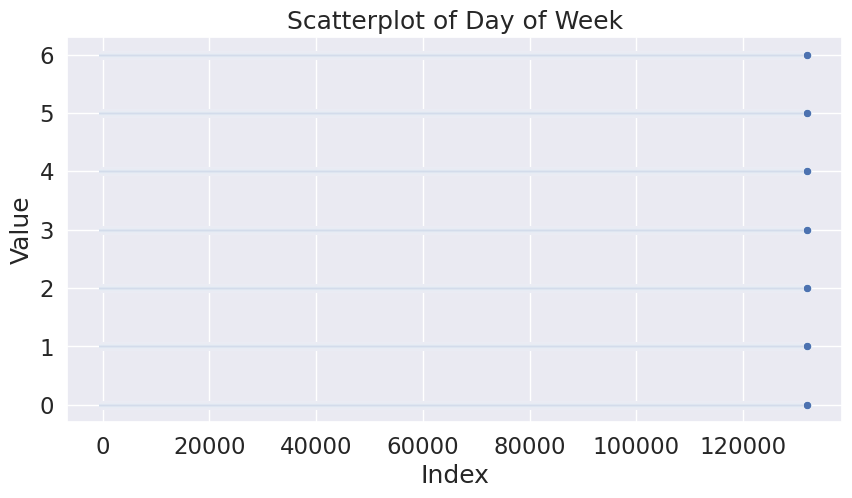

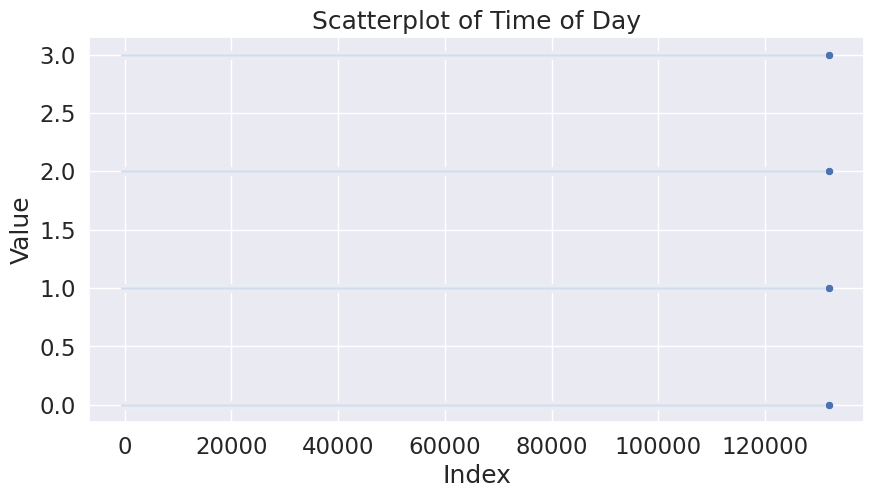

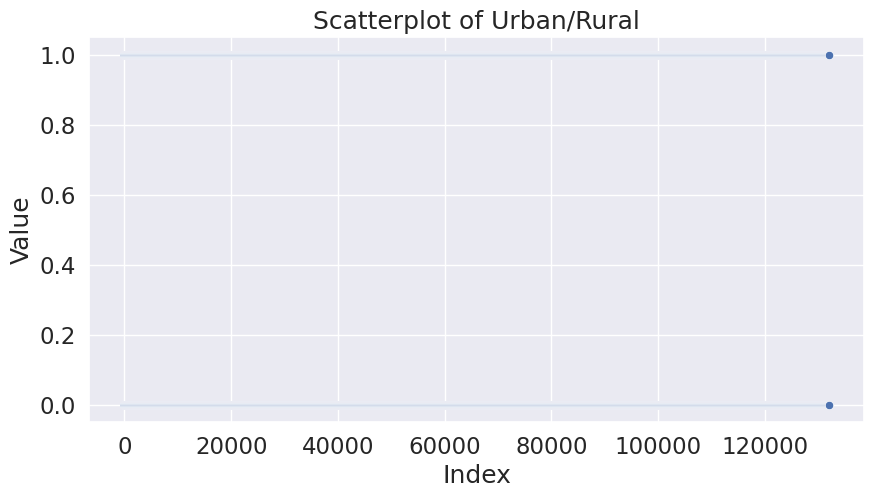

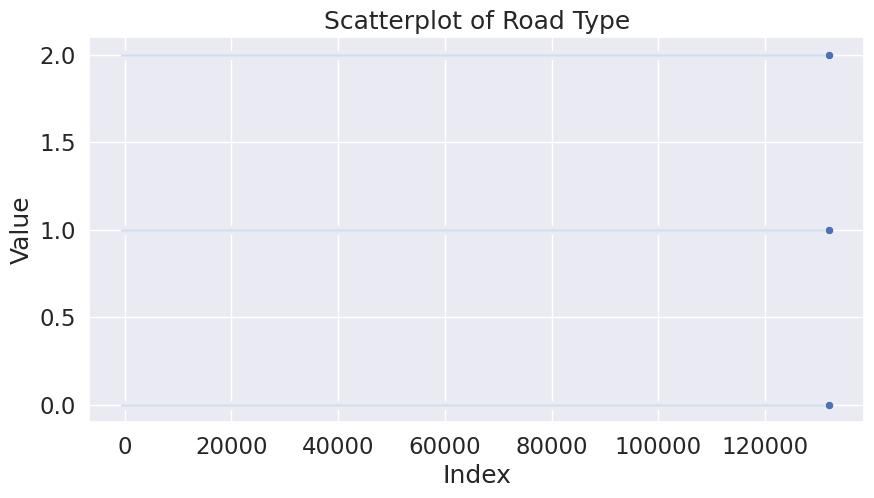

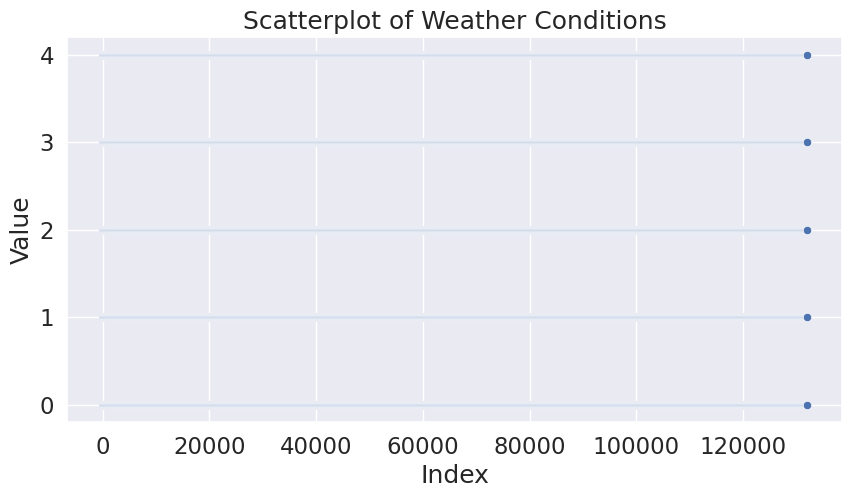

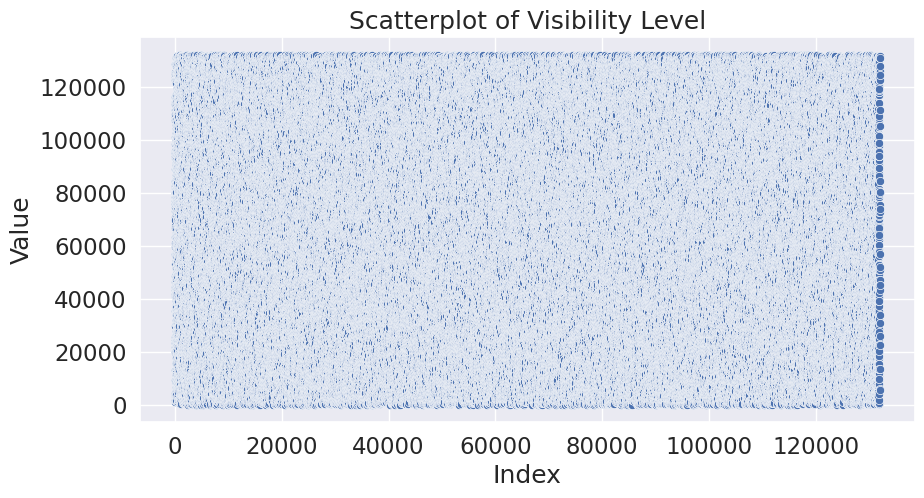

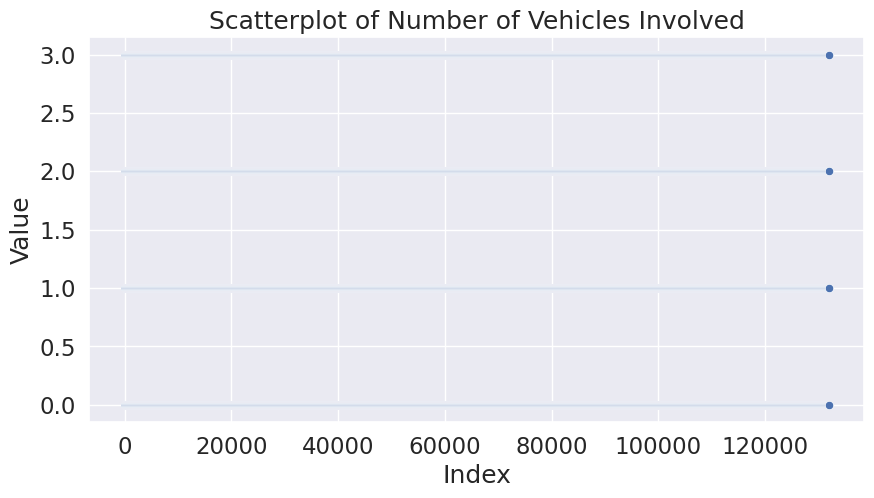

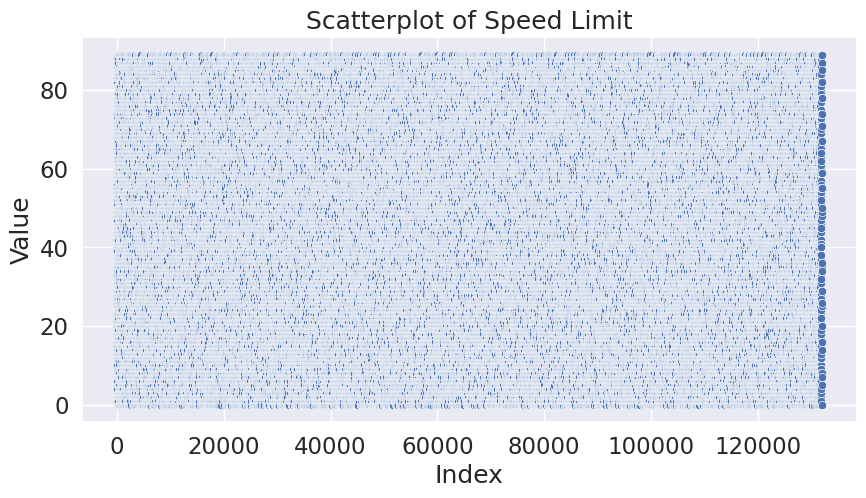

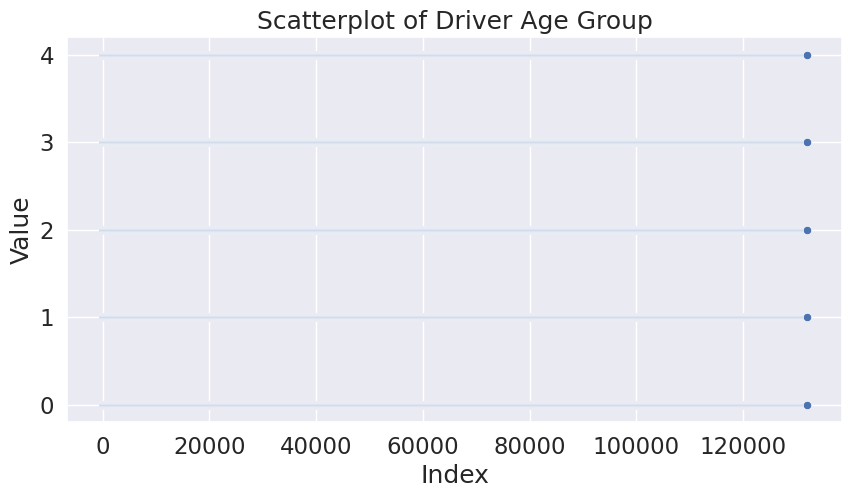

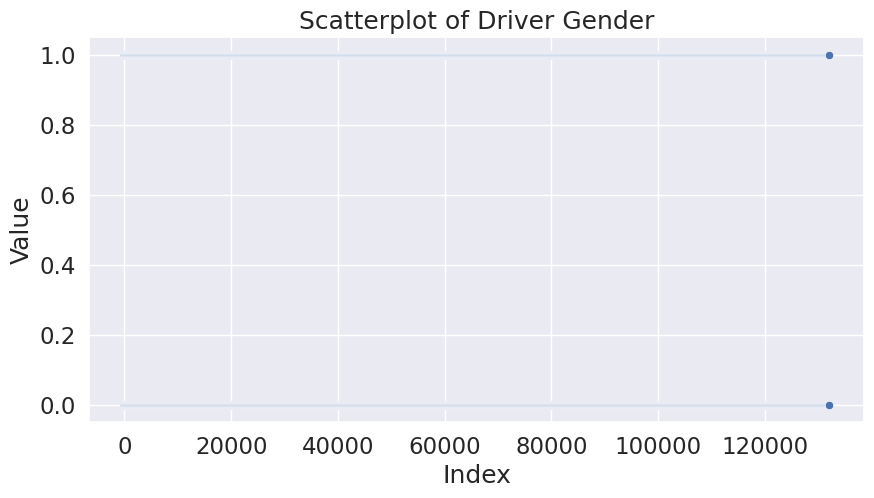

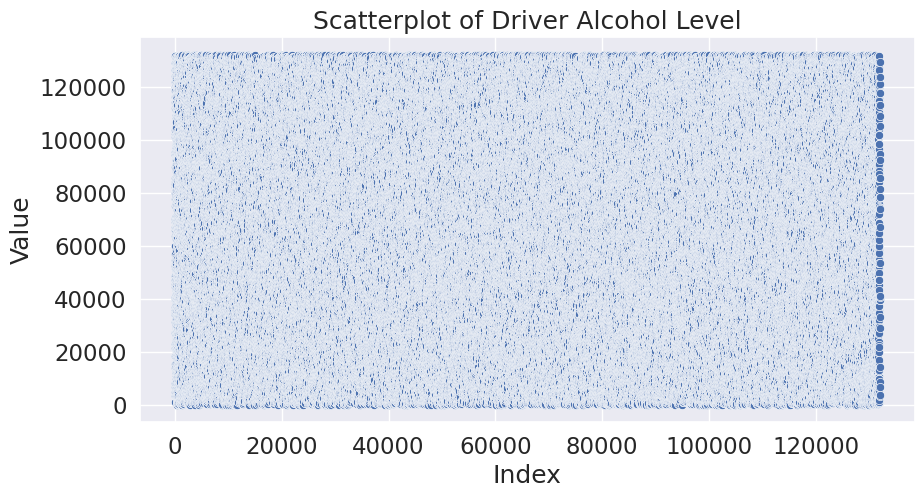

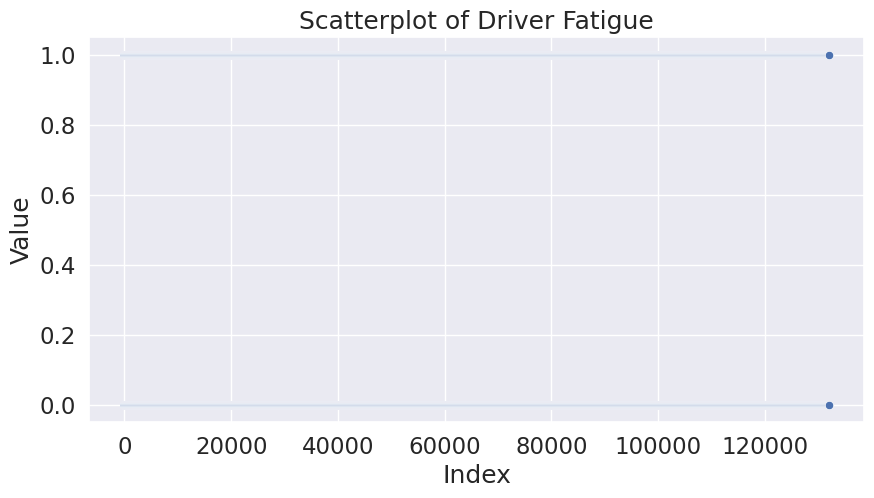

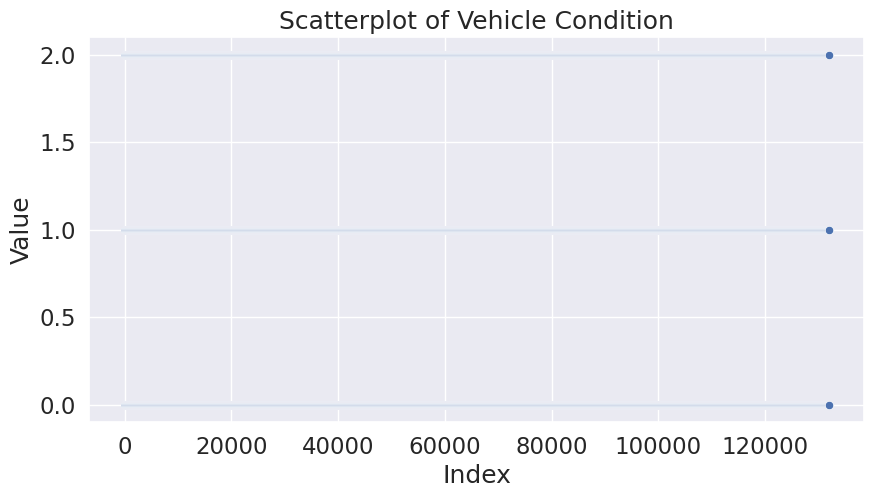

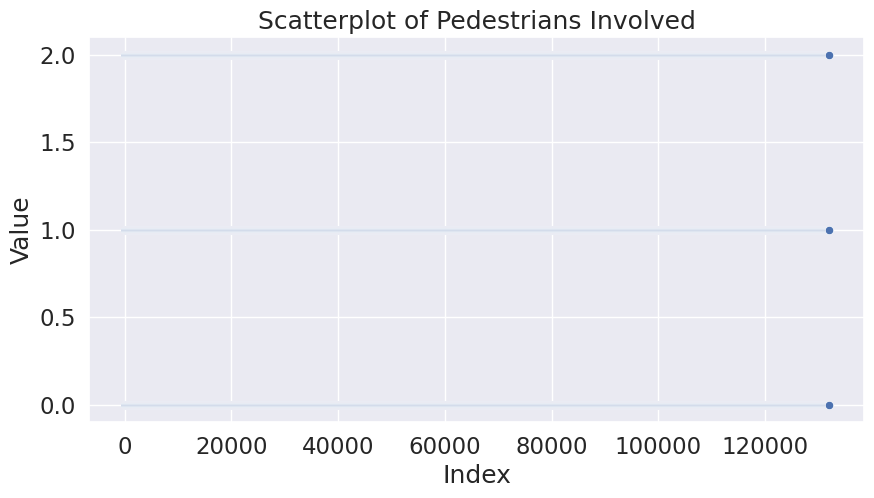

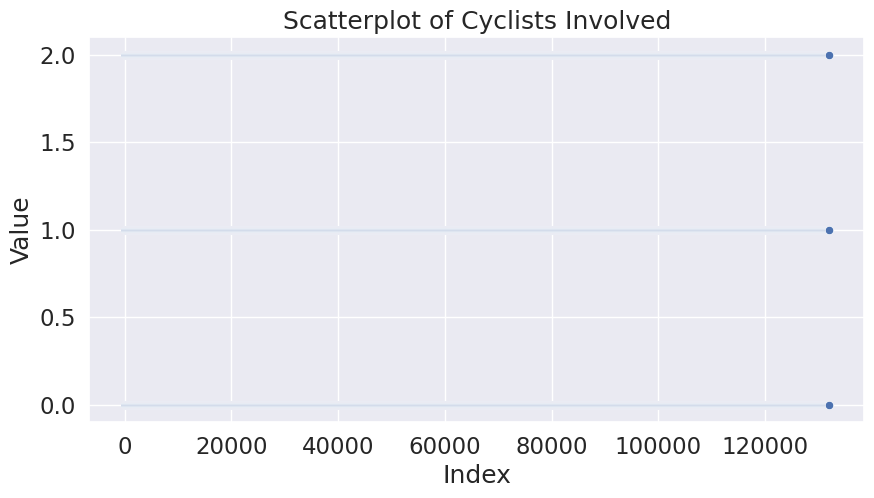

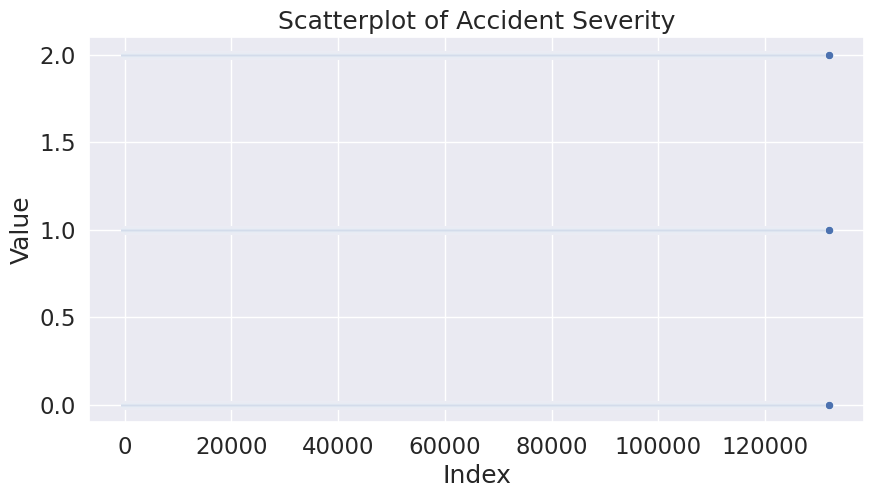

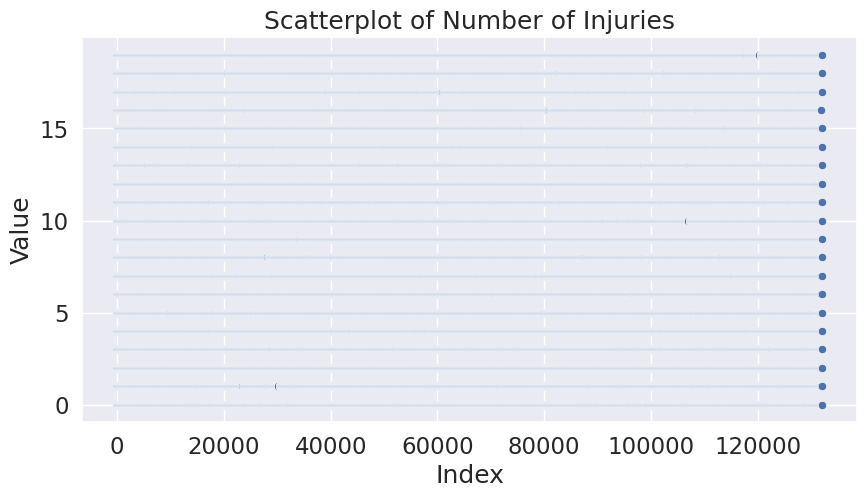

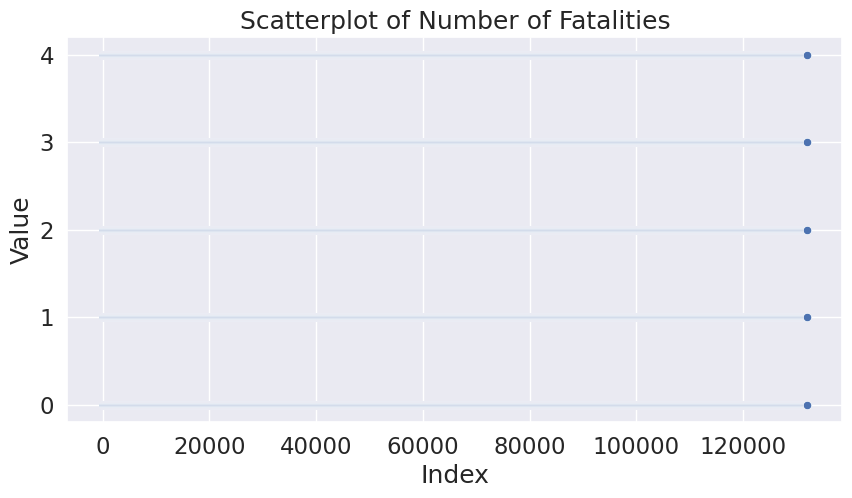

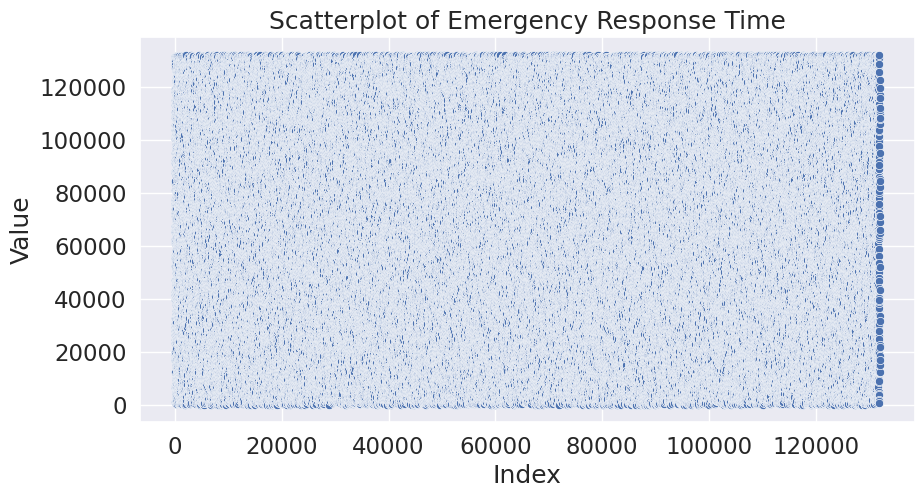

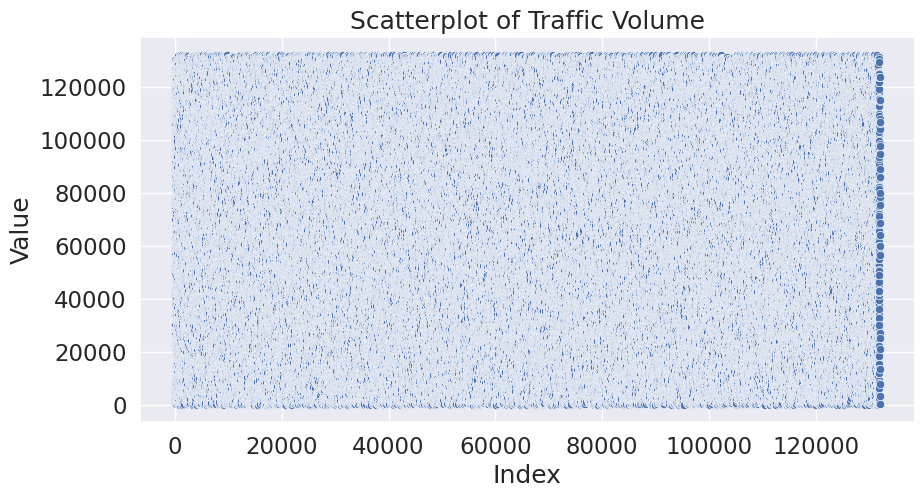

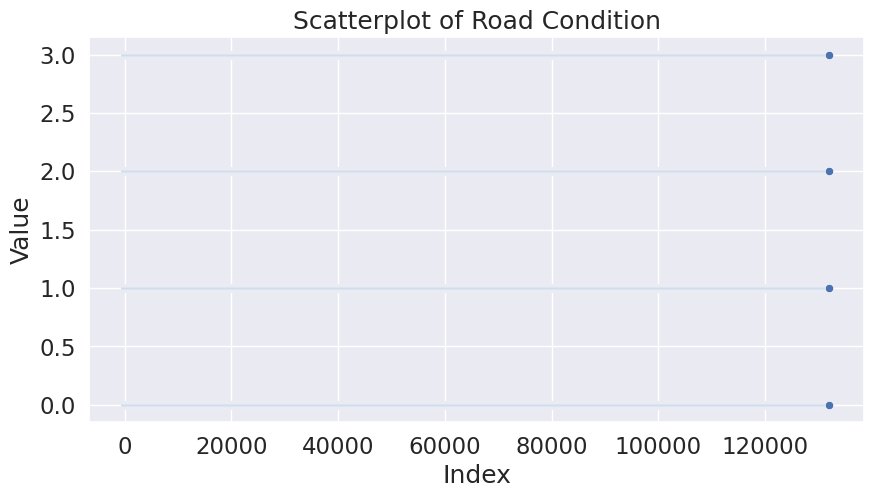

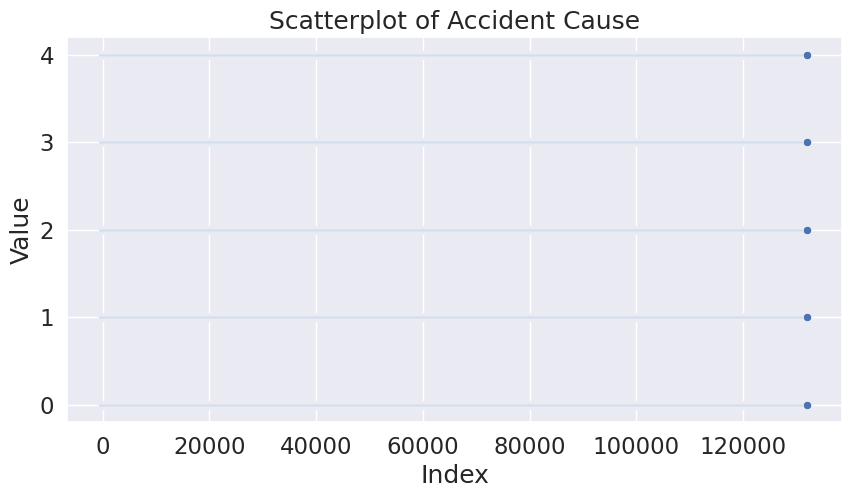

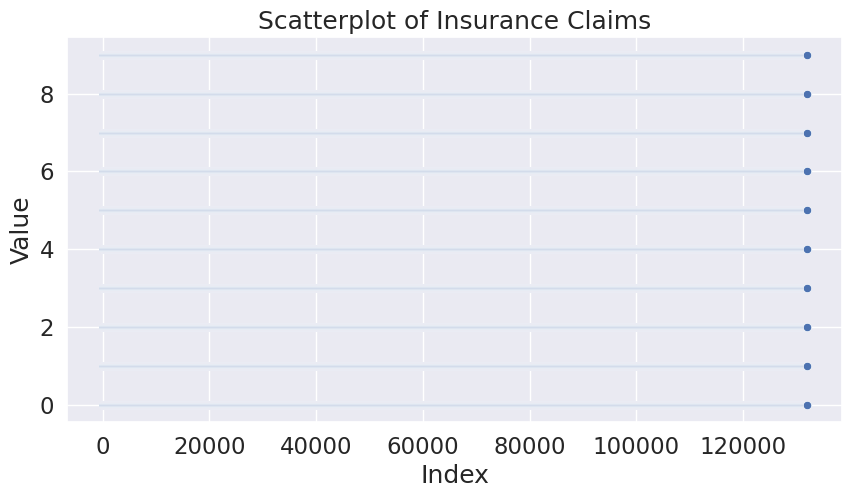

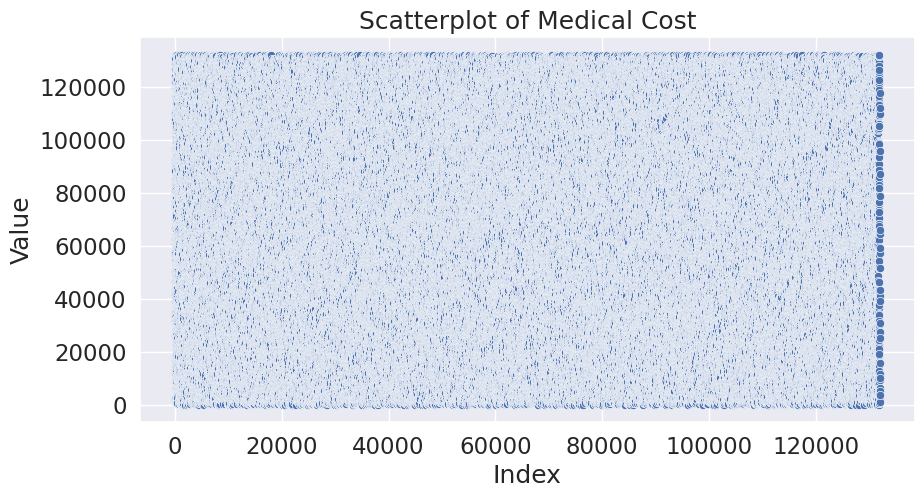

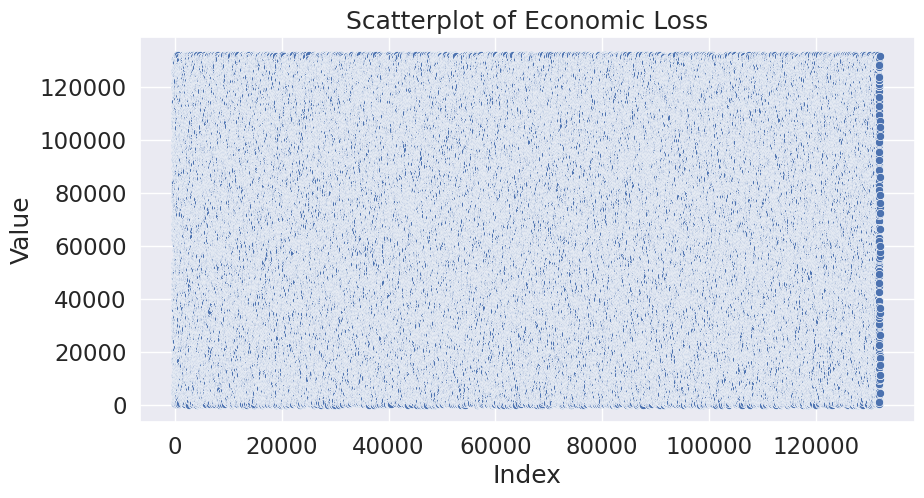

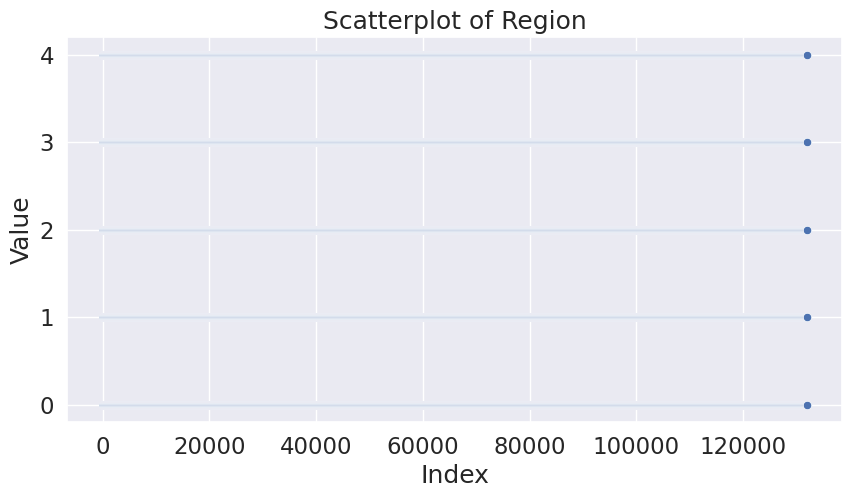

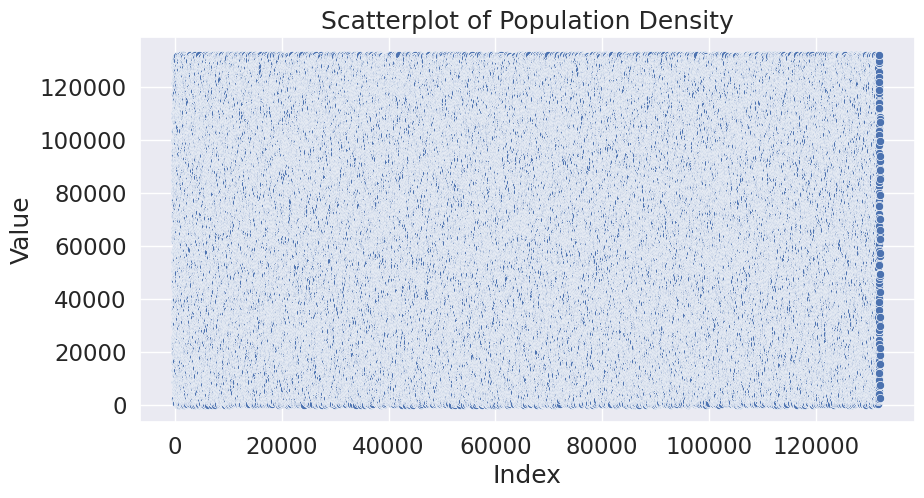

In [49]:
# Set figure size for better visibility
plt.figure(figsize=(15, 10))

# Loop through all columns and create scatterplots
for column in df.columns:
    plt.figure(figsize=(10, 5))  # Set size for each plot
    sns.scatterplot(x=df.index, y=df[column])  # Scatterplot for each column
    plt.title(f"Scatterplot of {column}")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.show()  # Show each plot separately

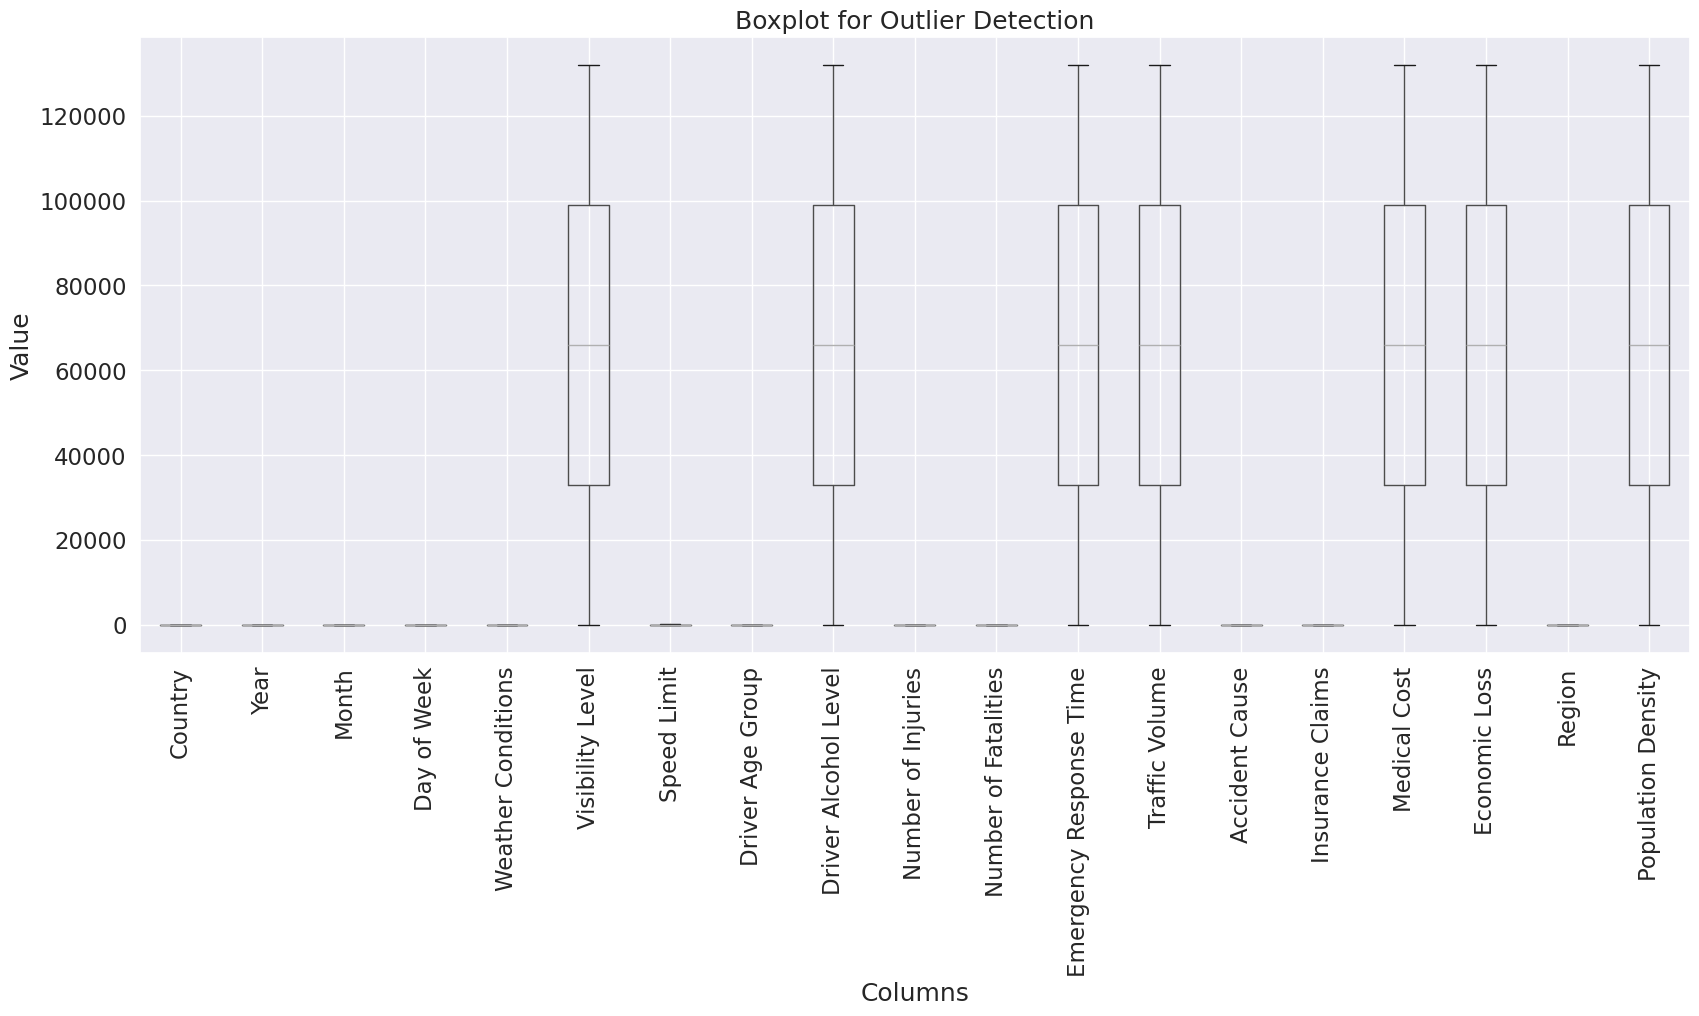

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns that need outlier detection (exclude those with only values {0,1,2,3})
columns_to_plot = [col for col in df.columns if not df[col].isin([0,1,2,3]).all()]

plt.figure(figsize=(20, 8))  # Adjust figure size for better visualization

# Plot boxplots for multiple columns
df[columns_to_plot].boxplot(rot=90)  # Rotate labels for readability
plt.title("Boxplot for Outlier Detection")
plt.ylabel("Value")
plt.xlabel("Columns")
plt.grid(True)
plt.show()

<ipython-input-51-44560e349ca2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rdstr_counts.index, y=rdstr_counts.values, palette="viridis")


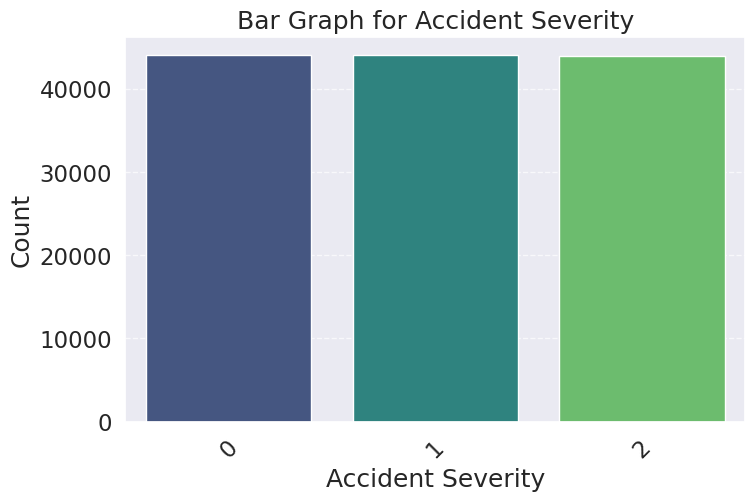

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each unique value in 'rdstr'
rdstr_counts = df['Accident Severity'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=rdstr_counts.index, y=rdstr_counts.values, palette="viridis")

# Labels and Title
plt.xlabel("Accident Severity")
plt.ylabel("Count")
plt.title("Bar Graph for Accident Severity")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

<ipython-input-52-2bb03375e121>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rdstr_counts.index, y=rdstr_counts.values, palette="viridis")


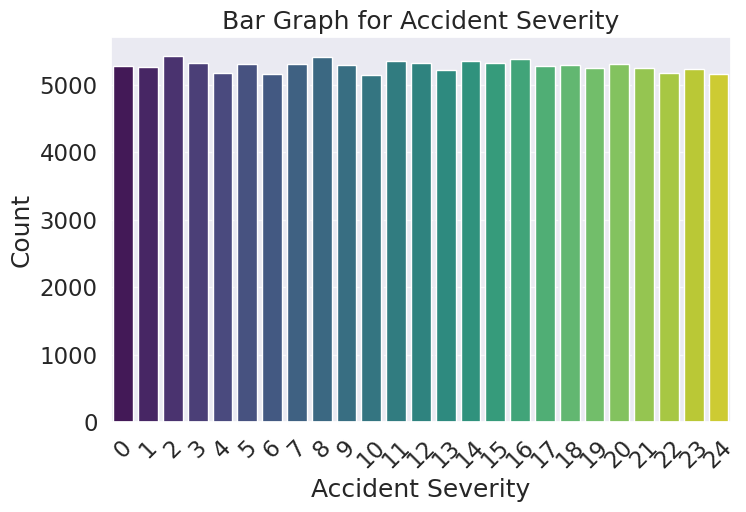

In [52]:
# Count the frequency of each unique value in 'rdstr'
rdstr_counts = df['Year'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=rdstr_counts.index, y=rdstr_counts.values, palette="viridis")

# Labels and Title
plt.xlabel("Accident Severity")
plt.ylabel("Count")
plt.title("Bar Graph for Accident Severity")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Country                      132000 non-null  int64
 1   Year                         132000 non-null  int64
 2   Month                        132000 non-null  int64
 3   Day of Week                  132000 non-null  int64
 4   Time of Day                  132000 non-null  int64
 5   Urban/Rural                  132000 non-null  int64
 6   Road Type                    132000 non-null  int64
 7   Weather Conditions           132000 non-null  int64
 8   Visibility Level             132000 non-null  int64
 9   Number of Vehicles Involved  132000 non-null  int64
 10  Speed Limit                  132000 non-null  int64
 11  Driver Age Group             132000 non-null  int64
 12  Driver Gender                132000 non-null  int64
 13  Driver Alcohol Level         

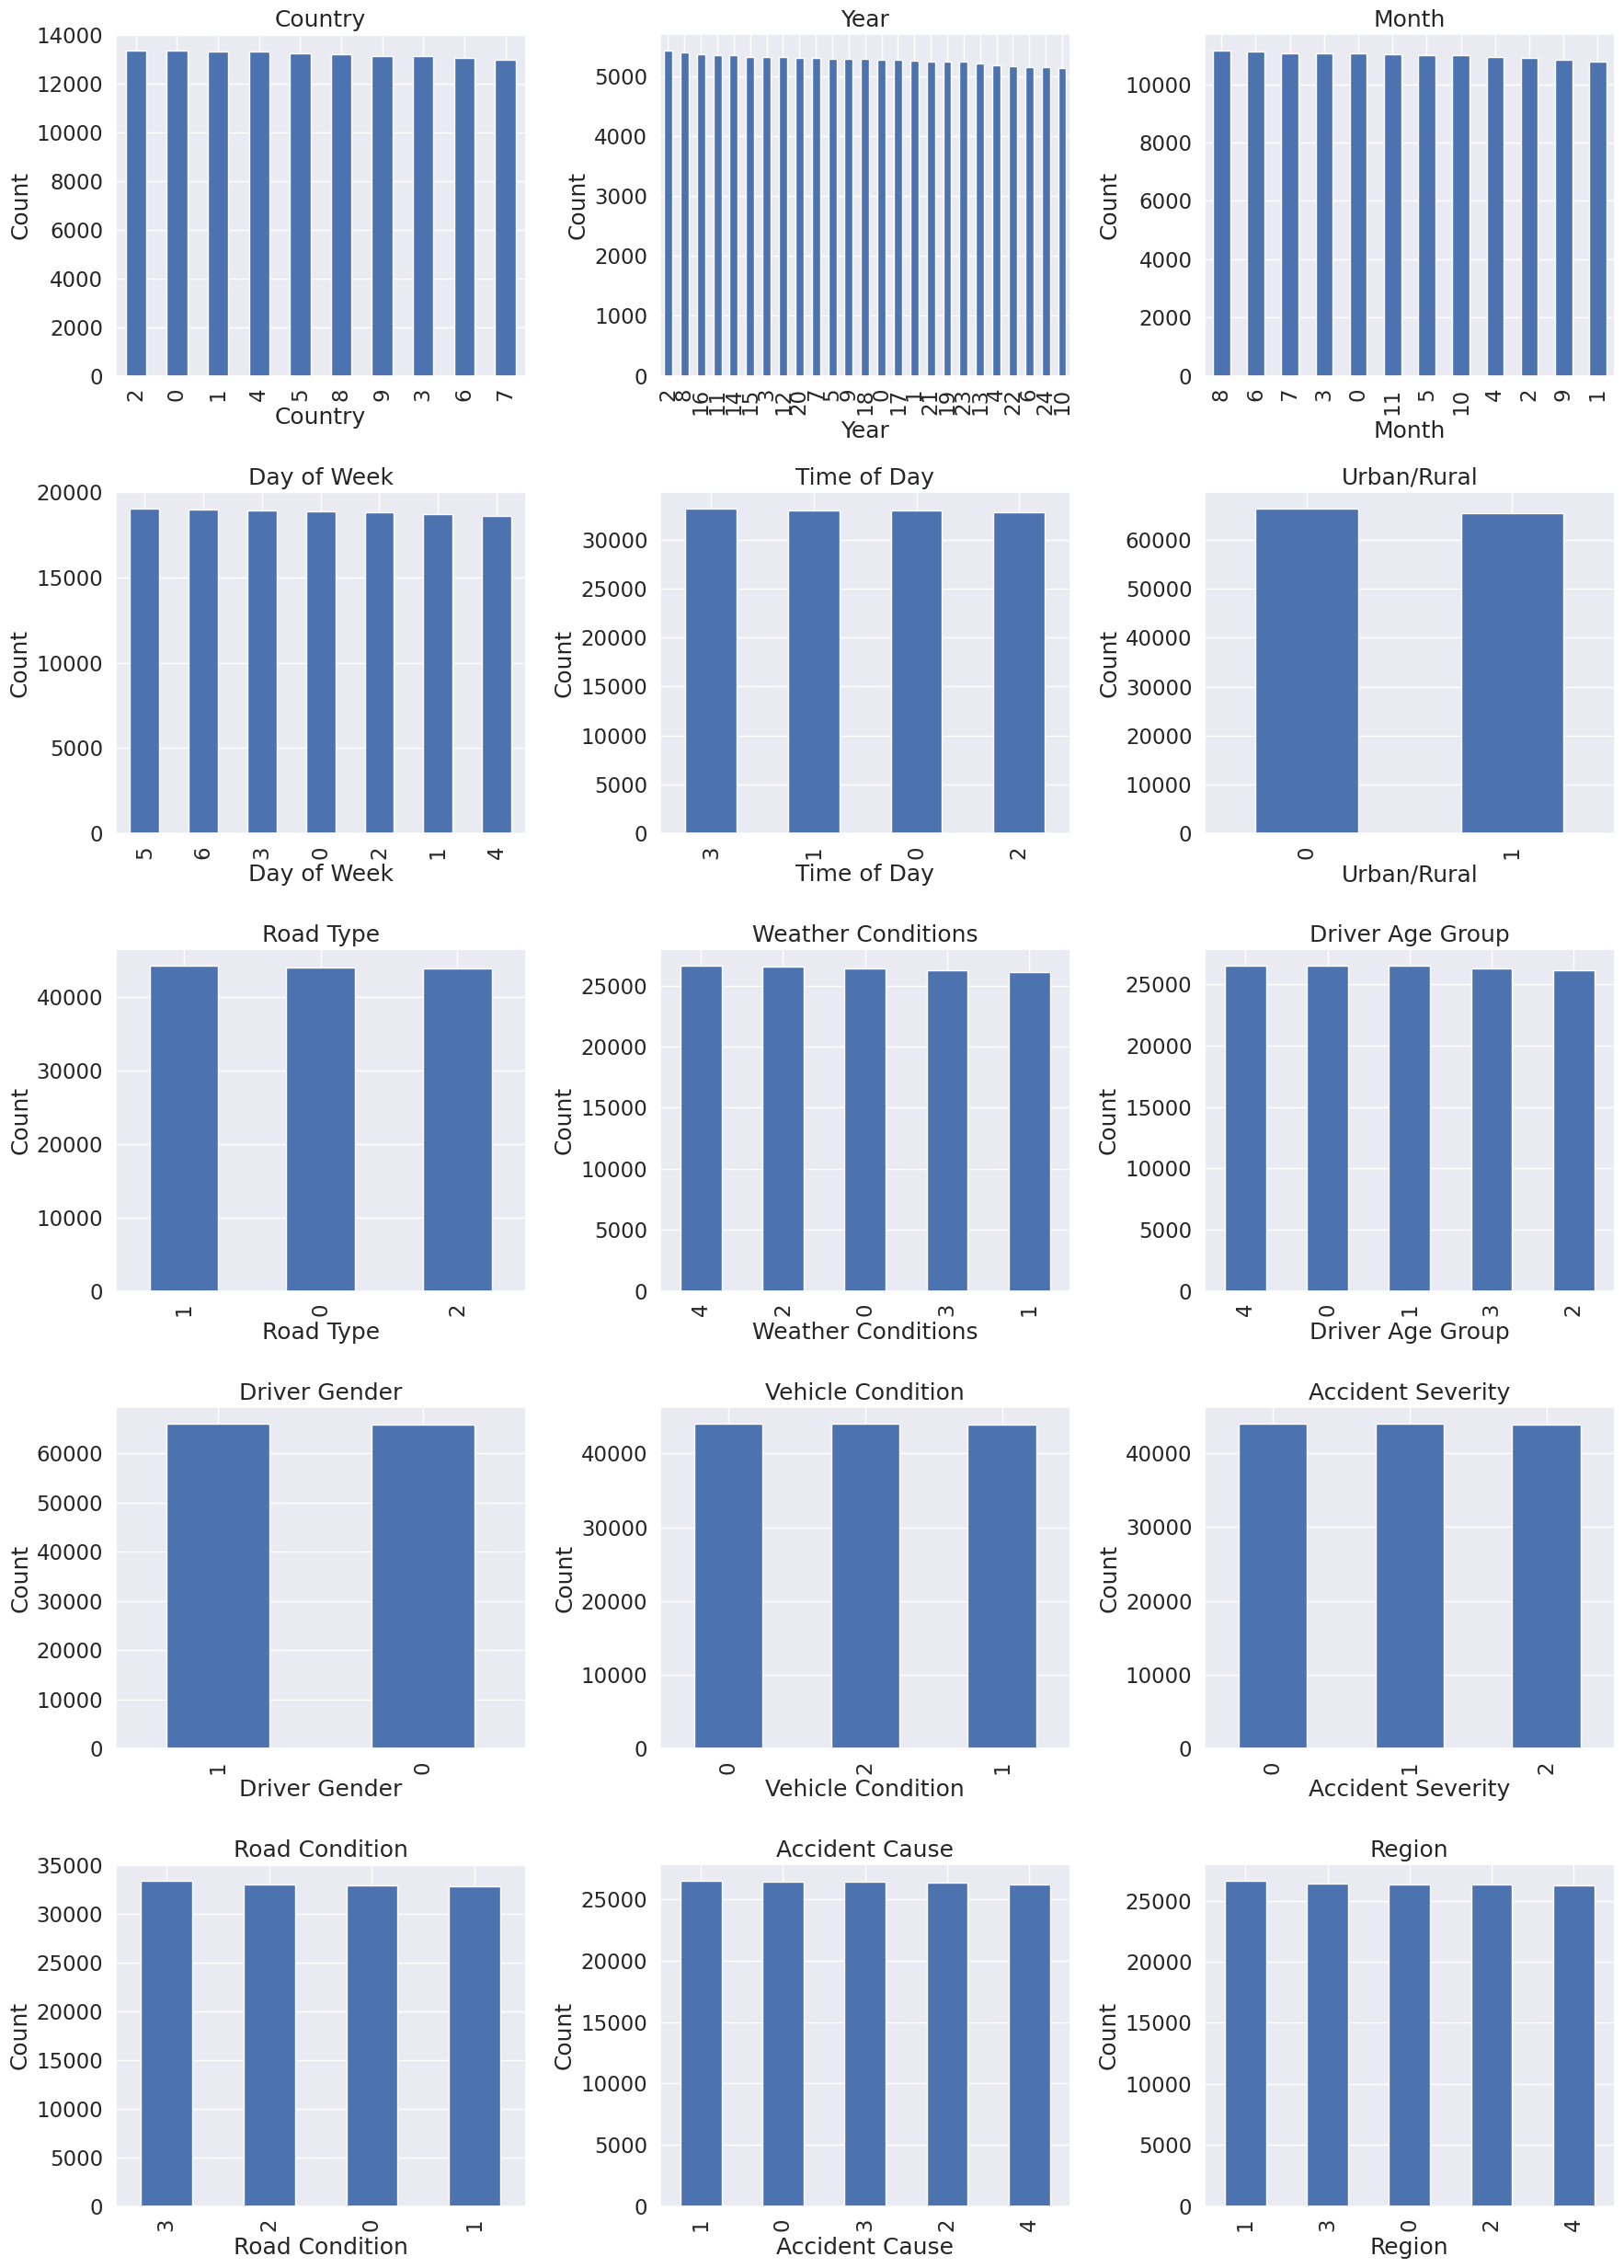

In [54]:
# List of categorical columns to visualize
columns = [
    "Country", "Year", "Month", "Day of Week", "Time of Day", "Urban/Rural",
    "Road Type", "Weather Conditions", "Driver Age Group", "Driver Gender",
    "Vehicle Condition", "Accident Severity", "Road Condition", "Accident Cause", "Region"
]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 25))
axes = axes.flatten()

# Generate bar plots for each categorical column
for i, col in enumerate(columns):
    if col in df.columns:
        df[col].value_counts().plot(kind="bar", ax=axes[i], title=col)
        axes[i].set_ylabel("Count")
    else:
        axes[i].axis("off")  # Hide axes if column is missing


plt.tight_layout()
plt.show()


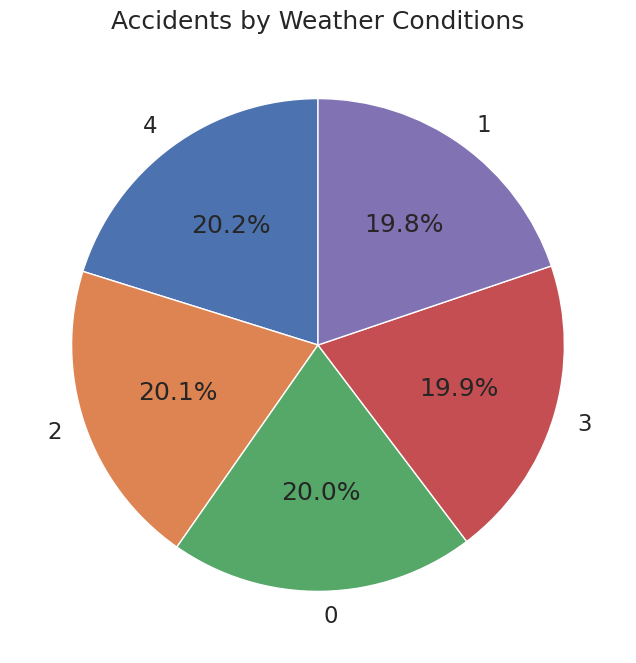

In [55]:
# Accidents by Weather Conditions
plt.figure(figsize=(8, 8))
df["Weather Conditions"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Accidents by Weather Conditions")
plt.ylabel("")
plt.show()

In [56]:
df.shape

(132000, 30)

In [57]:
df.columns

Index(['Country', 'Year', 'Month', 'Day of Week', 'Time of Day', 'Urban/Rural',
       'Road Type', 'Weather Conditions', 'Visibility Level',
       'Number of Vehicles Involved', 'Speed Limit', 'Driver Age Group',
       'Driver Gender', 'Driver Alcohol Level', 'Driver Fatigue',
       'Vehicle Condition', 'Pedestrians Involved', 'Cyclists Involved',
       'Accident Severity', 'Number of Injuries', 'Number of Fatalities',
       'Emergency Response Time', 'Traffic Volume', 'Road Condition',
       'Accident Cause', 'Insurance Claims', 'Medical Cost', 'Economic Loss',
       'Region', 'Population Density'],
      dtype='object')

In [58]:
from sklearn.preprocessing import StandardScaler
# Scaling the numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()

# Scaling the numeric columns
scaled_data = scaler.fit_transform(df[numeric_columns])


In [59]:
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 13):  # Trying clusters from 1 to 13
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


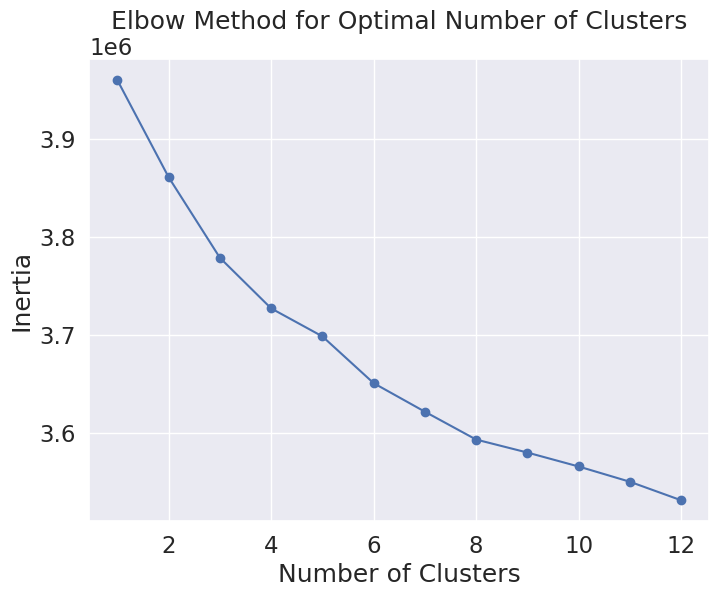

In [60]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 13), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


K = 4 as the elbow point and number of clusters

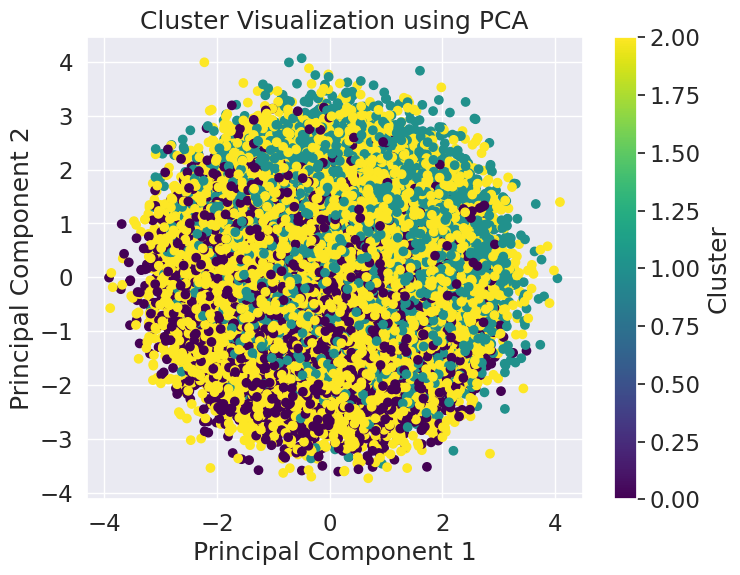

In [63]:
# Step 1: Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Change 3 to your chosen k
kmeans.fit(scaled_data)

# Step 2: Assign cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Step 3: Visualize the clusters using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.title('Cluster Visualization using PCA')
plt.show()


In [64]:
df.shape

(132000, 31)

In [65]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataset
df['Cluster'] = cluster_labels

# Print the centroids of the clusters
centroids = kmeans.cluster_centers_
print("Cluster Centroids:\n", centroids)


Cluster Centroids:
 [[ 2.45904123e-03  1.22914047e-02 -9.40611841e-03  1.45349135e-03
  -1.15357283e-02  3.07686122e-03 -1.40843922e-04  7.05090417e-03
   5.45285164e-03 -1.07162652e-02  7.35530651e-03  3.31452158e-02
  -1.00148595e+00 -8.64031547e-01  2.83061275e-03 -7.32425776e-03
  -4.37257011e-03 -4.30896981e-03  1.86113475e-02  2.18417698e-02
  -6.49642963e-03  4.04771612e-03 -3.23206629e-03 -5.96240390e-03
  -7.43782954e-03  1.17628229e-02 -2.59530491e-02  1.79577442e-02
   1.63449507e-02  2.02489539e-02]
 [-7.97279715e-03 -1.67909939e-02  7.63373358e-03  1.49752631e-03
   1.25594796e-02 -4.96793555e-03  9.22240703e-03 -8.79591810e-03
   6.66602193e-04  1.17149577e-02 -1.32719561e-02 -2.48794041e-02
  -1.00148595e+00  8.61780895e-01  8.78480886e-04  1.50306801e-02
   1.08936179e-02  5.27073926e-03 -6.49377370e-03 -1.38024568e-02
   9.78927081e-03 -1.18902140e-02 -3.22141628e-03  6.08211050e-03
   6.61265213e-03 -1.06299242e-02  2.57385687e-02 -2.11736971e-02
  -1.31237799e-02 -2.

In [66]:
df['Cluster'] = kmeans.labels_
df['Cluster'].value_counts()


Cluster
3    33159
1    33013
2    32939
0    32889
Name: count, dtype: int64

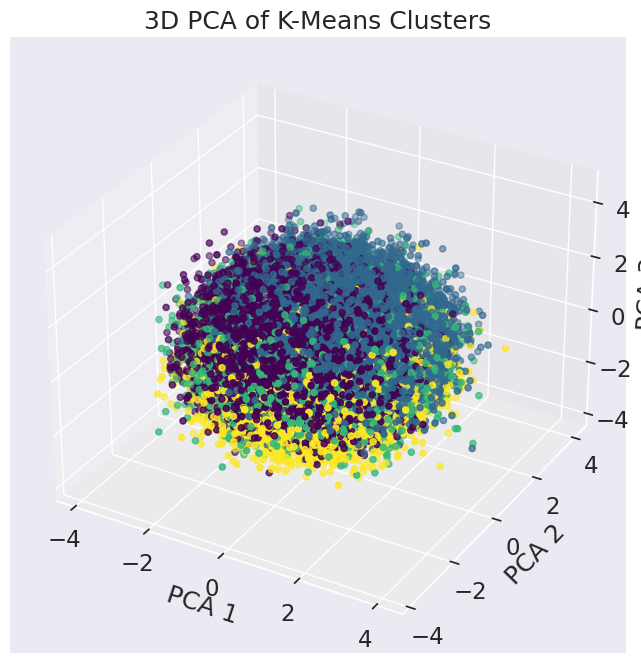

In [67]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
pca_data_3d = pca_3d.fit_transform(scaled_data)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data_3d[:, 0], pca_data_3d[:, 1], pca_data_3d[:, 2], c=cluster_labels, cmap='viridis')
ax.set_title('3D PCA of K-Means Clusters')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()


PCA 1 explains 3.42% of the variance
PCA 2 explains 3.42% of the variance
PCA 3 explains 3.41% of the variance


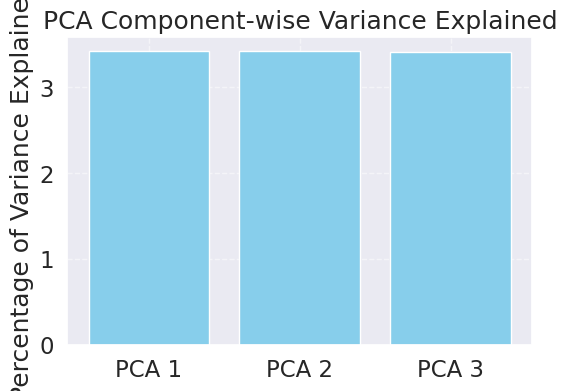

In [68]:
# Check explained variance ratio
explained_variance = pca_3d.explained_variance_ratio_

# Print variance explained by each PCA component
for i, var in enumerate(explained_variance):
    print(f"PCA {i+1} explains {var*100:.2f}% of the variance")

# Optionally, plot it
plt.figure(figsize=(6, 4))
plt.bar(range(1, 4), explained_variance * 100, tick_label=['PCA 1', 'PCA 2', 'PCA 3'], color='skyblue')
plt.ylabel('Percentage of Variance Explained')
plt.title('PCA Component-wise Variance Explained')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


So therefore 3D of PCA is not enough to visualize the clusters

In [69]:
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(scaler.inverse_transform(cluster_centers), columns=original_data.columns)
cluster_centers_df['Cluster'] = range(1, 5)
print(cluster_centers_df)


    Country       Year     Month  Day of Week  Time of Day  Urban/Rural  \
0  4.487978  12.061829  5.475211     3.010092     1.489285     0.497735   
1  4.457991  11.852477  5.533980     3.010180     1.516255     0.493713   
2  4.475728  11.980267  5.519172     3.007772     1.505176     0.329913   
3  4.501855  11.999005  5.502186     3.000724     1.498055     0.662324   

   Road Type  Weather Conditions  Visibility Level  \
0   0.999605            2.013861      66206.780223   
1   1.007241            1.991426      66024.401697   
2   0.996418            2.006406      65535.572452   
3   0.995627            2.003860      66227.934739   

   Number of Vehicles Involved  Speed Limit  Driver Age Group  Driver Gender  \
0                     1.489254    44.627686          2.045931   1.000311e-13   
1                     1.514316    44.091713          1.963733   1.000311e-13   
2                     1.499529    44.402593          1.993655   1.000000e+00   
3                     1.501764   